### LSE Data Analytics Online Career Accelerator

# Employer Project: My Community Finance - Exploratory Data Analysis

## Team M8

### Background:
My Community Finance (MCF)  is a loan broker and IT provider that works with a network of credit unions to provide savers and borrowers with access to ethical and more affordable lenders. Access to MCF’s network of credit unions allows applicants to benefit from credit unions’ more holistic approach to evaluation of applications. 

They consider factors beyond credit scores, such as individual character, stability and commitment to repayment. Additionally, they normally offer lower interest rates compared to traditional banks. This allows individuals who would typically be excluded from financial services to access cheaper loans tailored to their specific needs.

Loans to this demographic often carry a higher risk than traditional loans, and the current volatile economic environment further exacerbates factors which may impact affordability negatively. 

MCF wants to improve their affordability calculations to mitigate risk to their business while ensuring that potential clients have access to financial products they can afford and determine the most effective measures for assessing customers’ ability to repay their loans, the significant factors that have an impact on affordability of loans and how different demographic characteristics of applicants affect metrics concerned with their ability to pay.

### Main business requirements are:

1. Create a data-driven model to derive a loan affordability heuristics.  

2. Identify the most effective measures for assessing customers' ability to pay.

3. Assess the significant factors and correlations that contribute to and/or affect future affordability.

4. Identify the demographic factors that may have an effect on metrics, and the significance of their impact

## Team M8 GitHub Repository

[My Community Finance Repository](https://github.com/mszeszo/Team_M8)



### Import necessary packages and libraries

In [1]:
# Import packages and libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

import statsmodels.stats.api as sms
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

###  Load the data files

In [2]:
# Load the csv files 
df_sum = pd.read_csv('summary_block.csv')
df_apl = pd.read_csv('applicant_loan_info.csv')
df_bru = pd.read_csv('bureau_data.csv')

### Exploratory Data Analysis

In [3]:
# Check shape for applicant loan data.
df_apl.shape

(172961, 12)

In [4]:
# Check data types for applicant loan data.
print(df_apl.dtypes)

# Print column names.
print(df_apl.columns)

uuid                    object
date_created            object
amount_requested         int64
duration_requested       int64
reason                  object
annual_salary            int64
dependant_number       float64
dependants_spend       float64
has_mortgage            object
monthly_spending         int64
rent_mortgage_spend    float64
employment_status       object
dtype: object
Index(['uuid', 'date_created', 'amount_requested', 'duration_requested',
       'reason', 'annual_salary', 'dependant_number', 'dependants_spend',
       'has_mortgage', 'monthly_spending', 'rent_mortgage_spend',
       'employment_status'],
      dtype='object')


In [5]:
# Check info.
df_apl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172961 entries, 0 to 172960
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   uuid                 172961 non-null  object 
 1   date_created         172961 non-null  object 
 2   amount_requested     172961 non-null  int64  
 3   duration_requested   172961 non-null  int64  
 4   reason               172961 non-null  object 
 5   annual_salary        172961 non-null  int64  
 6   dependant_number     172960 non-null  float64
 7   dependants_spend     77705 non-null   float64
 8   has_mortgage         19419 non-null   object 
 9   monthly_spending     172961 non-null  int64  
 10  rent_mortgage_spend  172960 non-null  float64
 11  employment_status    172961 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 15.8+ MB


> There are 12 columns with 172961 entries. 5 columns with 'Object' data type.
Including:
uuid,
date_created,
reason,
has_mortgage and 
employment_status

In [6]:
# Convert the 'date_created' column to datetime format.
df_apl['date_created'] = pd.to_datetime(df_apl['date_created'],  format='%d/%m/%Y')

# Find the first and last date in the dataset.
first_date = df_apl['date_created'].min()
last_date = df_apl['date_created'].max()

print(first_date)
print(last_date)

2020-11-03 00:00:00
2021-10-31 00:00:00


> Provided data spans over 1 year(03/11/2020 to 31/10/2021).

In [7]:
# Sort applicantion loan data by date.
df_apl.sort_values(by=['date_created'], ascending=False, inplace=True)

# View the result.
df_apl.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status
137022,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0.0,NaN,NaN,270,0.0,FT_EMPLOYED
144099,77ac562e-5c09-4afe-99b2-1a7e586f8d70,2021-10-31,1400,12,home-improvements,25000,0.0,NaN,NaN,550,150.0,FT_EMPLOYED
144097,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0.0,NaN,NaN,500,0.0,FT_EMPLOYED
144096,90425b78-d321-4621-8093-62efa7a61cf5,2021-10-31,50000,120,home-improvements,70000,0.0,NaN,True,1500,600.0,FT_EMPLOYED
144095,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,10000,72,vehicle,20000,0.0,NaN,NaN,270,0.0,FT_EMPLOYED


In [8]:
# Look for missing values.  
print(df_apl.isnull().sum())

uuid                        0
date_created                0
amount_requested            0
duration_requested          0
reason                      0
annual_salary               0
dependant_number            1
dependants_spend        95256
has_mortgage           153542
monthly_spending            0
rent_mortgage_spend         1
employment_status           0
dtype: int64


> There is a single missing value in column 'dependant_number' and 'rent_mortgage-spend' and multiple missing values in 'dependants_spend' and 'has_mortgage' columns.

In [9]:
# Filter rows with 'dependant_number' NaN values.
missing_dep = df_apl[df_apl['dependant_number'].isna()]

# View row with single missing value.
missing_dep

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status
111817,312d8c1e-1f00-4f45-b27e-964efba4001f,2021-10-07,1000,12,home-improvements,600,NaN,NaN,NaN,400,NaN,UNEMPLOYED


In [10]:
# Filter rows with 'rent_mortgage_spend' NaN values.
missing_rent = df_apl[df_apl['rent_mortgage_spend'].isna()]

# View row with single missing value.
missing_rent

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status
111817,312d8c1e-1f00-4f45-b27e-964efba4001f,2021-10-07,1000,12,home-improvements,600,NaN,NaN,NaN,400,NaN,UNEMPLOYED


> Single missing value in 'rent_mortgage_spend' and 'dependant_number' for the same record. Low request for loan of 1000 pounds for 12 months with an annual salary of 600£ and unemployed status. Feasible to drop this one row.

In [11]:
# Drop one row with multiple missing values.
df_apl.dropna(subset=['dependant_number', 'rent_mortgage_spend'], inplace=True)

# Display the DataFrame after dropping.
df_apl.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status
137022,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0.0,NaN,NaN,270,0.0,FT_EMPLOYED
144099,77ac562e-5c09-4afe-99b2-1a7e586f8d70,2021-10-31,1400,12,home-improvements,25000,0.0,NaN,NaN,550,150.0,FT_EMPLOYED
144097,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0.0,NaN,NaN,500,0.0,FT_EMPLOYED
144096,90425b78-d321-4621-8093-62efa7a61cf5,2021-10-31,50000,120,home-improvements,70000,0.0,NaN,True,1500,600.0,FT_EMPLOYED
144095,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,10000,72,vehicle,20000,0.0,NaN,NaN,270,0.0,FT_EMPLOYED


In [12]:
# Convert 'dependant_number' datatype (float) to integer.
df_apl['dependant_number'] = df_apl['dependant_number'].astype('int64')

# Verify the data type conversion.
print(df_apl.dtypes)

uuid                           object
date_created           datetime64[ns]
amount_requested                int64
duration_requested              int64
reason                         object
annual_salary                   int64
dependant_number                int64
dependants_spend              float64
has_mortgage                   object
monthly_spending                int64
rent_mortgage_spend           float64
employment_status              object
dtype: object


> Dependant_number converted to integer datatype, as number of people represented by whole numbers.

In [13]:
# Count of how many applications per uuid.
count_uuid = df_apl['uuid'].value_counts()
count_uuid.head()

720c83e8-a4d7-494b-b41d-61309a9b0fe3    918
b9bb50e0-f02d-4c41-8161-ff32c4dc215f    217
f38e8590-0af5-431a-b7d9-0b60a9f7dfd9    189
7a242173-a7d4-45eb-a506-b12b131d4df4    136
29b23d1d-0aae-491f-abbb-405d42d5b04b    132
Name: uuid, dtype: int64

> There are multiple applications submitted by the same user.

In [14]:
# Count the number of applications per uuid using transform.
df_apl['number_applications'] = df_apl.groupby('uuid')['uuid'].transform('count')

# Display the dataframe with the new 'number_applications' column.
df_apl.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status,number_applications
137022,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0,NaN,NaN,270,0.0,FT_EMPLOYED,22
144099,77ac562e-5c09-4afe-99b2-1a7e586f8d70,2021-10-31,1400,12,home-improvements,25000,0,NaN,NaN,550,150.0,FT_EMPLOYED,3
144097,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0,NaN,NaN,500,0.0,FT_EMPLOYED,3
144096,90425b78-d321-4621-8093-62efa7a61cf5,2021-10-31,50000,120,home-improvements,70000,0,NaN,True,1500,600.0,FT_EMPLOYED,1
144095,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,10000,72,vehicle,20000,0,NaN,NaN,270,0.0,FT_EMPLOYED,22


In [15]:
# Descriptive statistics.
df_apl['number_applications'].describe()

count    172960.000000
mean         14.198300
std          68.454489
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max         918.000000
Name: number_applications, dtype: float64

In [16]:
apl = df_apl.copy()

### Comment
> We can see that many people applied more than 1 time.

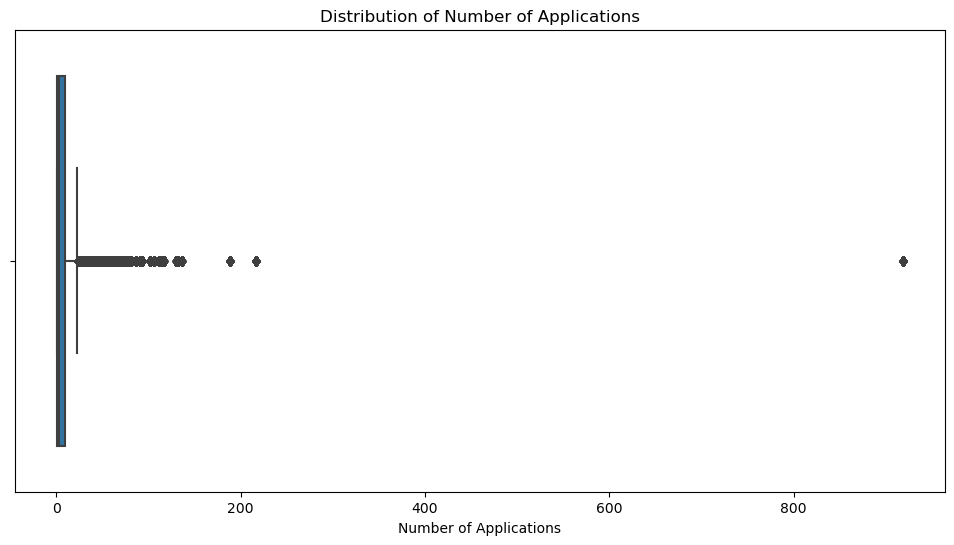

In [17]:
# Plot distribution.
plt.figure(figsize = (12, 6))
sns.boxplot(data=apl, x='number_applications')

# Add a title and labels to the axes.
plt.title('Distribution of Number of Applications')
plt.xlabel('Number of Applications')

# Display the plot.
plt.show()

In [18]:
# Print unique values in 'reason_requested' column.
print(apl['reason'].unique())

# Print unique values in 'employment_status' column.
print(apl['employment_status'].unique())

['vehicle' 'home-improvements' 'debt' 'other' 'purchase']
['FT_EMPLOYED' 'PT_EMPLOYED' 'SELF_EMPLOYED' 'WORK_AT_HOME' 'UNEMPLOYED'
 'RETIRED' 'STUDENT']


> There are 5 unique reasons declared in the "reason" column.

> There are 7 employment statuses declared in the "employment status" column.

## Comment: Decided to represent as binary to facilitate furhter analysis.

In [19]:
# Identify % of missing values in has_mortgage column.
missing_has_mortgage = (apl['has_mortgage'].isnull().sum() / len(apl)) * 100

# Print result.
print("Missing Values in 'has_mortgage':", round(missing_has_mortgage, 2), "%")

Missing Values in 'has_mortgage': 88.77 %


> Large percentage of missing values in 'has_mortgage' column.

In [20]:
# View 'has_mortgage' column.
print(apl['has_mortgage'])

137022     NaN
144099     NaN
144097     NaN
144096    True
144095     NaN
          ... 
5599       NaN
4799       NaN
5647      True
5398      True
4699      True
Name: has_mortgage, Length: 172960, dtype: object


In [21]:
# Replace NaN in 'has_mortgage' column as 'unknown'.
apl['has_mortgage'].fillna('unknown', inplace=True)

# View the result.
print(apl['has_mortgage'])

137022    unknown
144099    unknown
144097    unknown
144096       True
144095    unknown
           ...   
5599      unknown
4799      unknown
5647         True
5398         True
4699         True
Name: has_mortgage, Length: 172960, dtype: object


In [22]:
# Check percentage of missing values in 'dependants_spend' column.
missing_dependant = (apl['dependants_spend'].isnull().sum() / len(apl)) * 100

# Print the result.
print("Missing Values in 'dependants_spend':", round(missing_dependant, 2), "%")

Missing Values in 'dependants_spend': 55.07 %


> Dependants spend recorded only by (100-55.07) 44.93% of the applicants. Check whether there are applicants with declared dependants but with no dependants_spend recorded.

In [23]:
# Look for aplicants with declared dependant but without recorded spend.
count_missing_spend = len(apl[(apl['dependant_number'] >= 1) & (apl['dependants_spend'].isnull())])

# View the result.
print(f"Number of rows with declared dependant but without recorded spend: {count_missing_spend}")

Number of rows with declared dependant but without recorded spend: 0


> All applicants with declared dependant recorded the dependant spend. Thus it is acceptable to replace missing values with 0. (Missing values correspond with 0 dependants).

In [24]:
# Fill missing values of dependants_spend with 0.
apl['dependants_spend'] = apl['dependants_spend'].fillna(0)

# View dataframe.
apl.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status,number_applications
137022,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0,0.0,unknown,270,0.0,FT_EMPLOYED,22
144099,77ac562e-5c09-4afe-99b2-1a7e586f8d70,2021-10-31,1400,12,home-improvements,25000,0,0.0,unknown,550,150.0,FT_EMPLOYED,3
144097,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0,0.0,unknown,500,0.0,FT_EMPLOYED,3
144096,90425b78-d321-4621-8093-62efa7a61cf5,2021-10-31,50000,120,home-improvements,70000,0,0.0,True,1500,600.0,FT_EMPLOYED,1
144095,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,10000,72,vehicle,20000,0,0.0,unknown,270,0.0,FT_EMPLOYED,22


In [25]:
# Recheck for missing values.
print(apl.isnull().sum())

uuid                   0
date_created           0
amount_requested       0
duration_requested     0
reason                 0
annual_salary          0
dependant_number       0
dependants_spend       0
has_mortgage           0
monthly_spending       0
rent_mortgage_spend    0
employment_status      0
number_applications    0
dtype: int64


> All missing values in the dataset addressed.

In [26]:
# Descriptive statistics.
apl.describe()

,amount_requested,duration_requested,annual_salary,dependant_number,dependants_spend,monthly_spending,rent_mortgage_spend,number_applications
count,172960.000000,172960.000000,1.729600e+05,172960.000000,1.729600e+05,172960.000000,172960.000000,172960.000000
mean,8498.593415,44.794600,8.706638e+04,0.728151,3.366859e+04,894.317241,418.059754,14.198300
std,7684.103044,23.063526,5.255675e+06,1.057920,3.045959e+06,755.523472,2736.807879,68.454489
min,1000.000000,12.000000,0.000000e+00,0.000000,0.000000e+00,251.000000,0.000000,1.000000
25%,3000.000000,24.000000,2.189200e+04,0.000000,0.000000e+00,500.000000,200.000000,1.000000
50%,6500.000000,48.000000,2.940000e+04,0.000000,0.000000e+00,800.000000,373.000000,3.000000
75%,11000.000000,60.000000,4.000000e+04,1.000000,1.000000e+02,1100.000000,540.000000,10.000000
max,100000.000000,240.000000,1.860020e+09,6.000000,2.764472e+08,43431.000000,830200.000000,918.000000


> The amount(in pounds) of a loan requested by applicants varied between 1000(min) and 100000(max) with a mean value of 8498.

> The duration(in months) of a loan requested varied between 12(min-1 year) and 240(max-20years) with a mean of 44.79(~3.7 years).

> Monthly spending(in pounds) varies between 251(min) and 43431(max) with a mean of 894.

> Rent mortgage spend(in pounds) varies between 0 and 830200(max) with a mean of 418.

> Declared annual salary spans between extremely large and unachievable figures with min of 0 and max of 1,860,020,000 with a mean of 87,066.38.

> Dependant spend varies between 0 (min) and 276,447,200 (max).

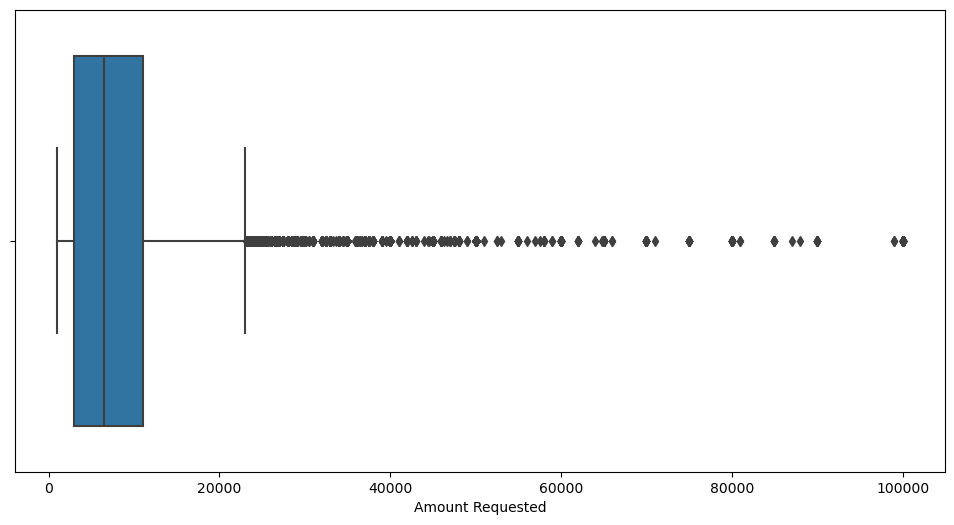

In [27]:
# Visualise boxplot Amount requested.
# Set the figure size (12, 6) and the plot style as white.
plt.figure(figsize = (12, 6))
sns.boxplot(x=apl['amount_requested'])

# Name x axis.
plt.xlabel('Amount Requested')

# Display the plot.
plt.show()

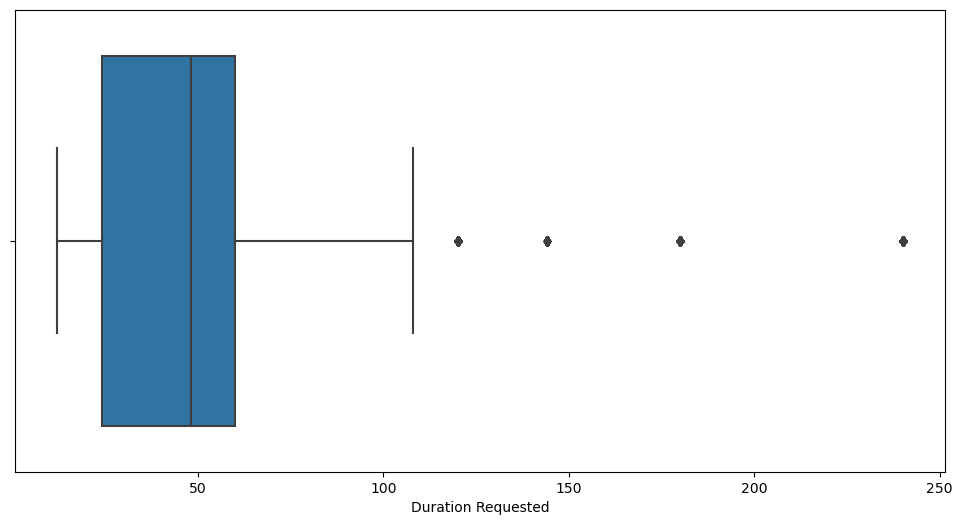

In [28]:
# Visualise boxplot Duration requested.
plt.figure(figsize = (12, 6))
sns.boxplot(x=apl['duration_requested'])

# Name x axis.
plt.xlabel('Duration Requested')

# Display the plot.
plt.show()

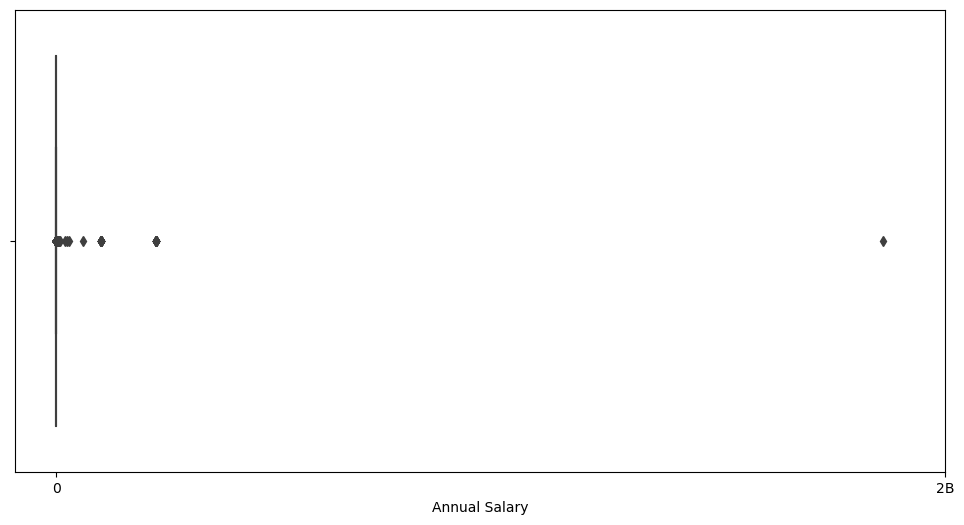

In [29]:
# Visualise boxplot Annual Salary.
plt.figure(figsize = (12, 6))
sns.boxplot(x=apl['annual_salary'])

# Name x axis.
plt.xlabel('Annual Salary')

# Change x scale.
xtick_labels = ['0','2B']
xtick_positions = [0, 2000000000]
plt.xticks(xtick_positions, xtick_labels)

# Display the plot.
plt.show()

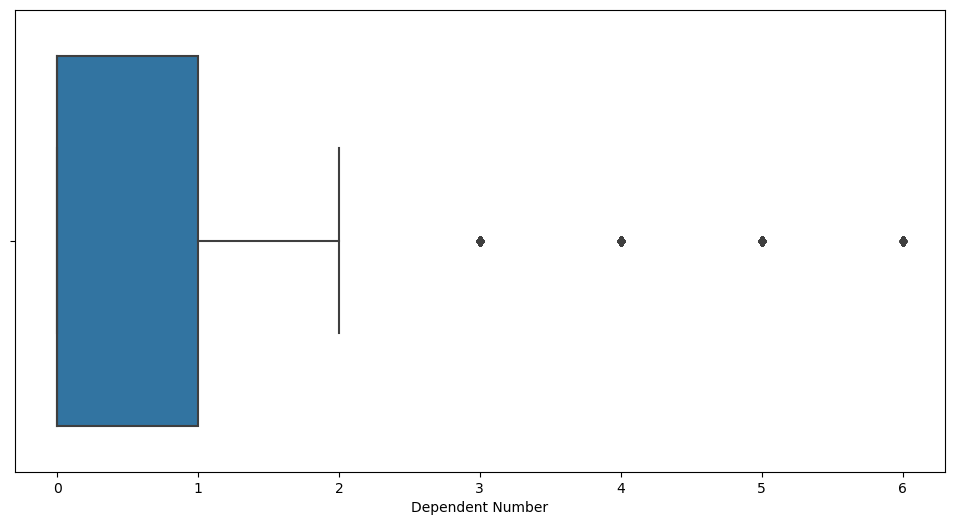

In [30]:
# Visualise boxplot Dependant Number.
plt.figure(figsize = (12, 6))
sns.boxplot(x=apl['dependant_number'])

# Give X - axis name
plt.xlabel('Dependent Number')

# Display the plot.
plt.show()

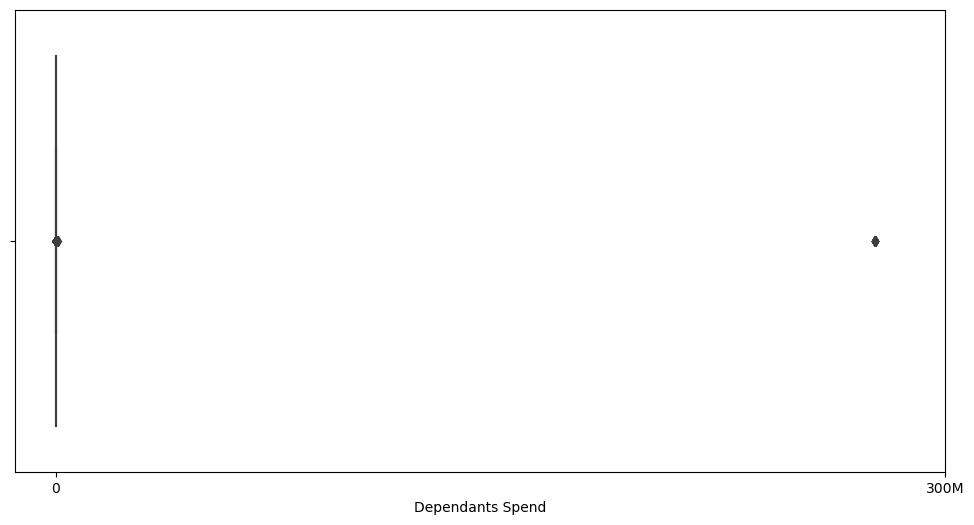

In [31]:
# Visualise boxplot Dependants Spend.
plt.figure(figsize = (12, 6))
sns.boxplot(x=apl['dependants_spend'])

# Name x axis.
plt.xlabel('Dependants Spend')

# Change x scale .
xtick_labels = ['0','300M']
xtick_positions = [0, 300000000]
plt.xticks(xtick_positions, xtick_labels)

# Display the plot.
plt.show()

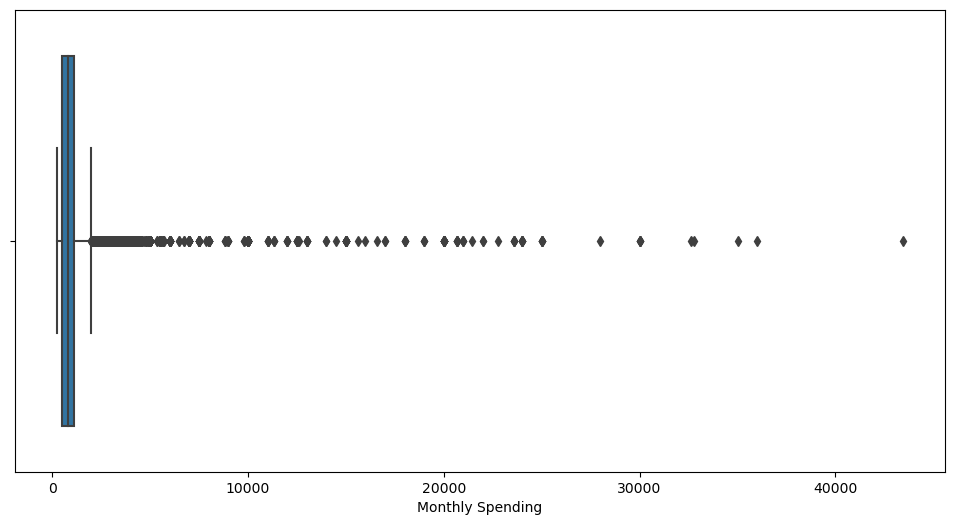

In [32]:
# Visualise boxplot Monthly Spending.
plt.figure(figsize = (12, 6))
sns.boxplot(x=apl['monthly_spending'])

# Name x axis.
plt.xlabel('Monthly Spending')

# Display the plot.
plt.show()

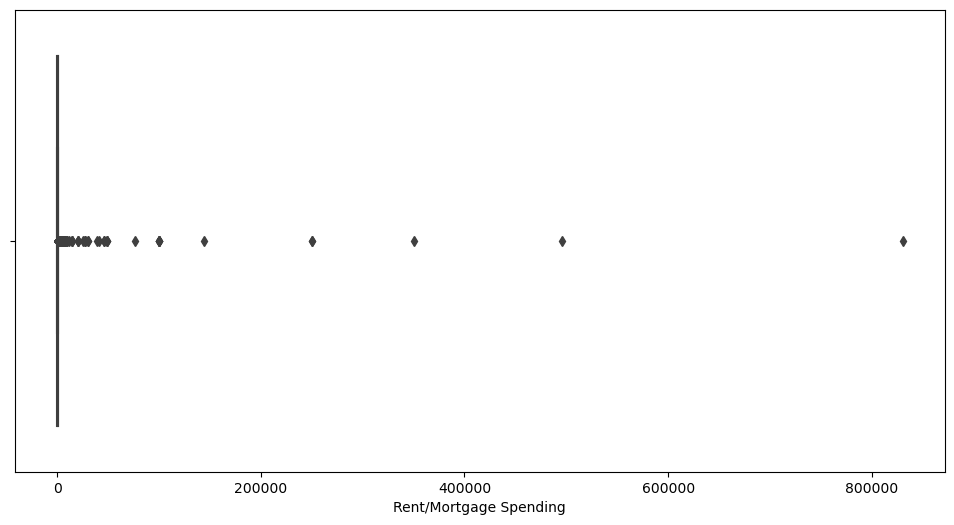

In [33]:
# Visualise boxplot Rent/Mortgage Spending.
plt.figure(figsize = (12, 6))
sns.boxplot(x=apl['rent_mortgage_spend'])

# Name x axis.
plt.xlabel('Rent/Mortgage Spending')

# Display the plot.
plt.show()

> Boxplots created suggest that data is not normally distributed. Annual_salary, dependant_spend and rent_mortgage_spend boxplot reveal extreme outliers.

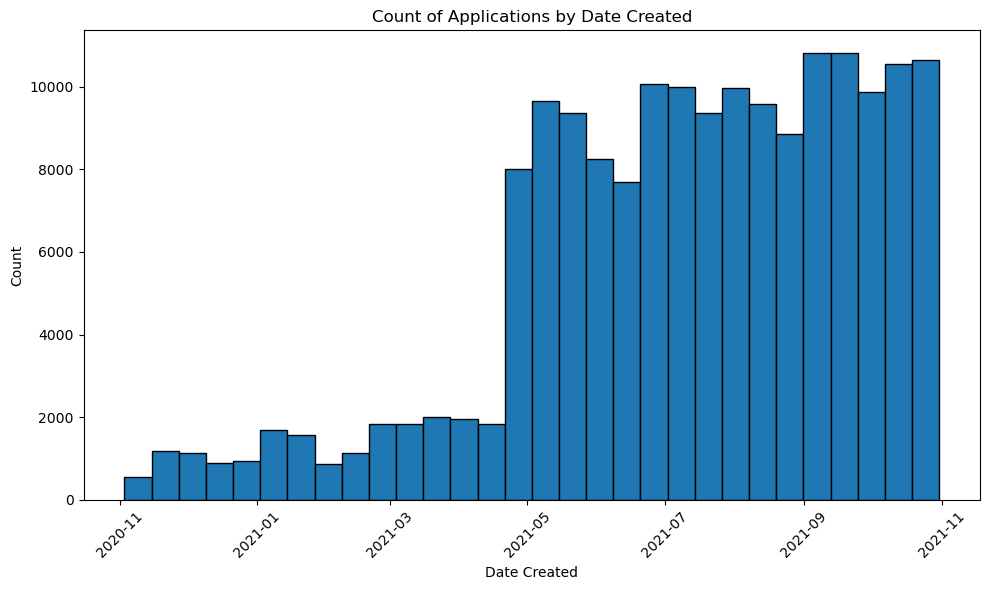

In [34]:
# Historgram for 'date_created'.
plt.figure(figsize = (10, 6))
plt.hist(apl['date_created'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Date Created')
plt.ylabel('Count')
plt.title('Count of Applications by Date Created')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Number of created applications increased significantly in the second 6-months of the captured period, since 05/2021.
4-5 fold.

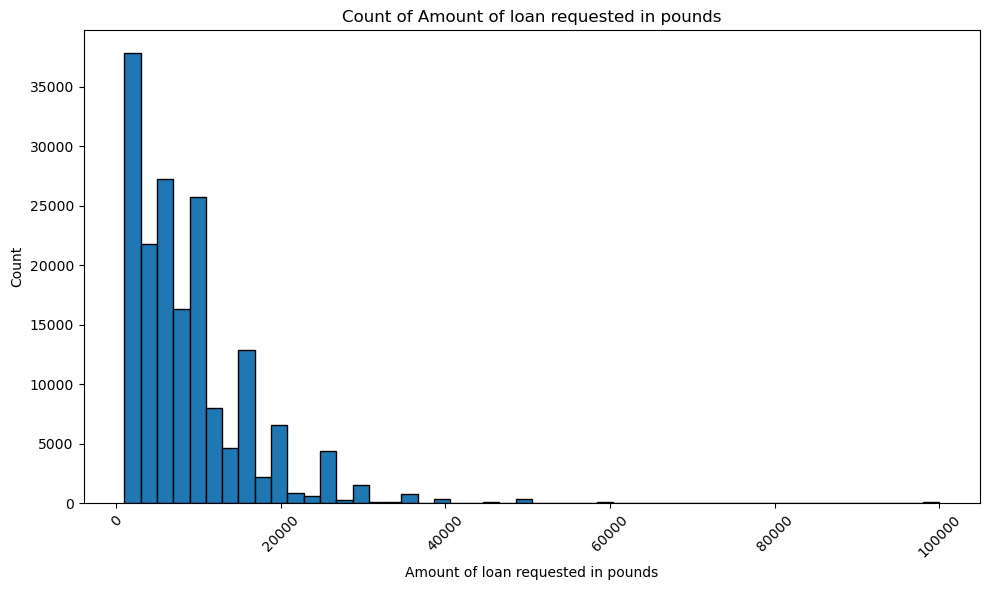

In [35]:
# Historgram for 'amount_requested'.
plt.figure(figsize = (10, 6))
plt.hist(apl['amount_requested'], bins=50, edgecolor='black')
plt.xlabel('Amount of loan requested in pounds')
plt.ylabel('Count')
plt.title('Count of Amount of loan requested in pounds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> £100,000 is the highest amount of loan requested.

In [36]:
# Find the most frequent duration of loan requested.
print(apl['duration_requested'].unique())
print(apl['duration_requested'].value_counts())

[ 48  12  24 120  72  36  60  96  18 240  30  84 180 144 108]
60     51031
36     28846
48     23783
24     21233
12     17412
18      7852
30      6619
96      5742
72      5667
84      3604
120      619
240      270
180      178
144       83
108       21
Name: duration_requested, dtype: int64


> The most frequent duration of loan requested by applicants is 60 months(5years), 36months(3 years), 48 months(4 years), 24 months (2 years) and 12 months (1 year).

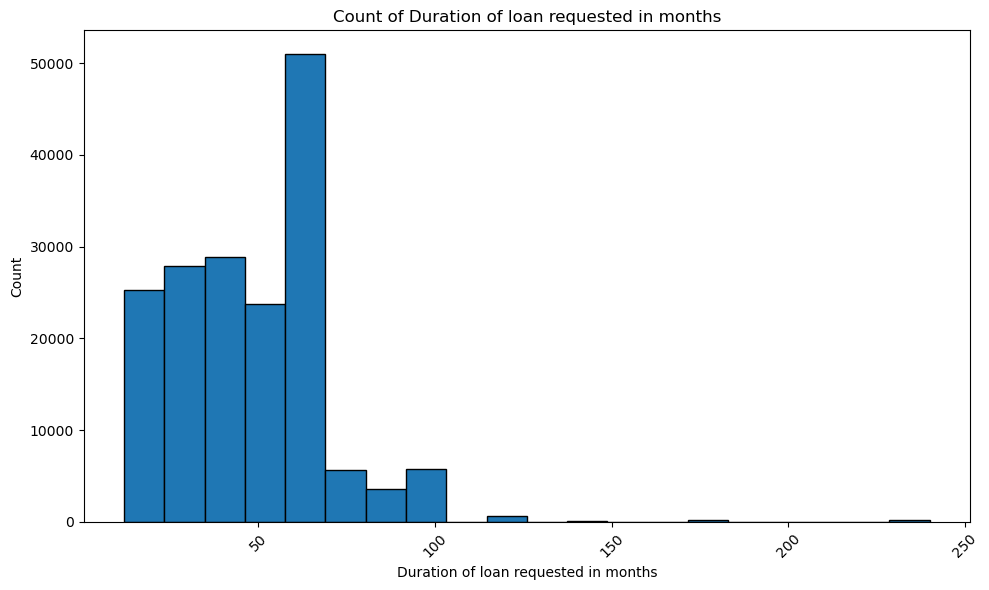

In [37]:
# Historgram for 'duration_requested'.
plt.figure(figsize = (10, 6))
plt.hist(apl['duration_requested'], bins=20, edgecolor='black')
plt.xlabel('Duration of loan requested in months')
plt.ylabel('Count')
plt.title('Count of Duration of loan requested in months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
# Print counts for declared reasons for loans.
print(apl['reason'].value_counts())

debt                 63577
home-improvements    34098
vehicle              31883
other                26479
purchase             16923
Name: reason, dtype: int64


> 63577 requests for loan were to cover a debt.

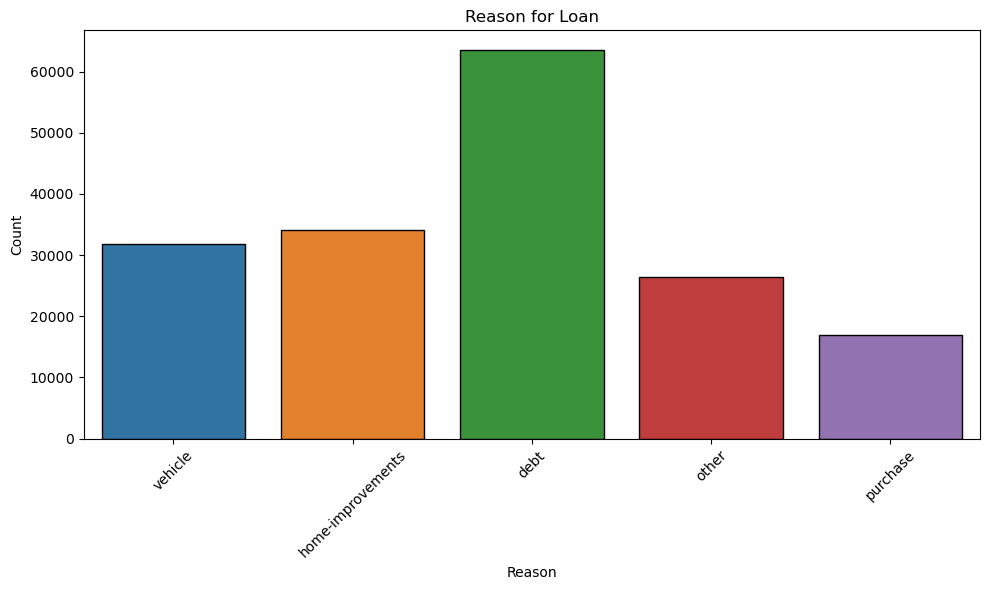

In [39]:
# Create a count plot for 'reason' for loan.
plt.figure(figsize = (10, 6))
sns.countplot(data=apl, x='reason', edgecolor='black')
plt.xlabel('Reason') 
plt.ylabel('Count')
plt.title('Reason for Loan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Print counts for declared annual salary.
print(apl['annual_salary'].value_counts())
print(apl['annual_salary'].max())

30000    7702
25000    6075
24000    5737
40000    5171
35000    4717
         ... 
19170       1
39159       1
57208       1
43888       1
46369       1
Name: annual_salary, Length: 7869, dtype: int64
1860020100


> Most frequent declared annual salary 30 000 (7702 applicants). Maximal salary declared 1,860,020,100.

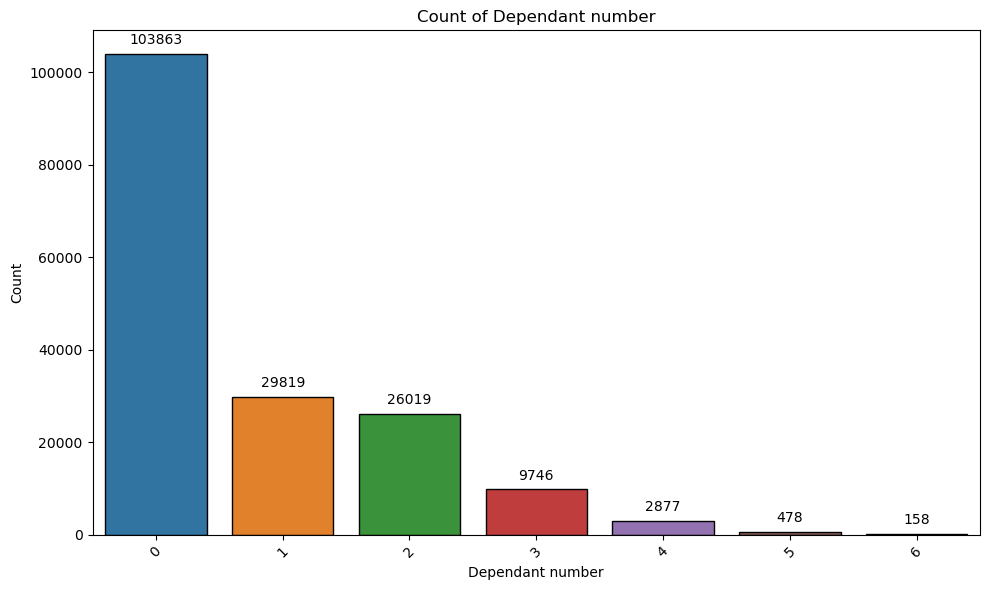

In [41]:
# Count plot for dependant number.
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=apl, x='dependant_number', edgecolor='black')

# Add actual count values on top of each bar.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
    
# label the axes.
plt.xlabel('Dependant number')
plt.ylabel('Count')
plt.title('Count of Dependant number')
plt.xticks(rotation=45)
plt.tight_layout()

# Display plot.
plt.show()

> Majority of applicants have no dependants.

In [42]:
# Print counts for declared dependant spend.
print(apl['dependants_spend'].value_counts())
print(apl['dependants_spend'].max())

0.0      118327
100.0     11951
200.0      8702
50.0       5291
300.0      3858
          ...  
7.0           1
341.0         1
389.0         1
191.0         1
212.0         1
Name: dependants_spend, Length: 485, dtype: int64
276447231.0


> 118327 applicants have no declared dependant spend. Maximal spend declared 276.447.231.

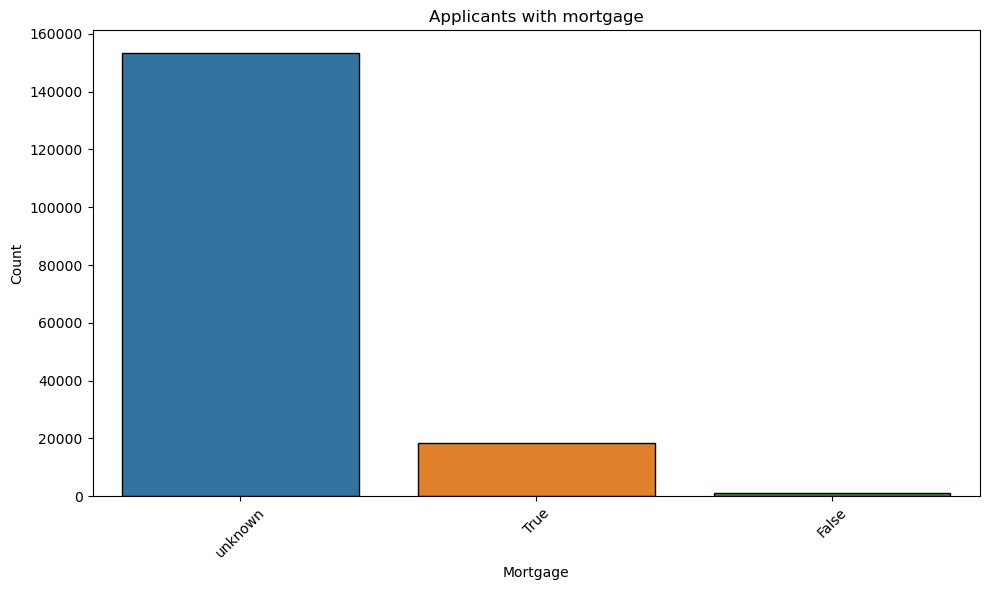

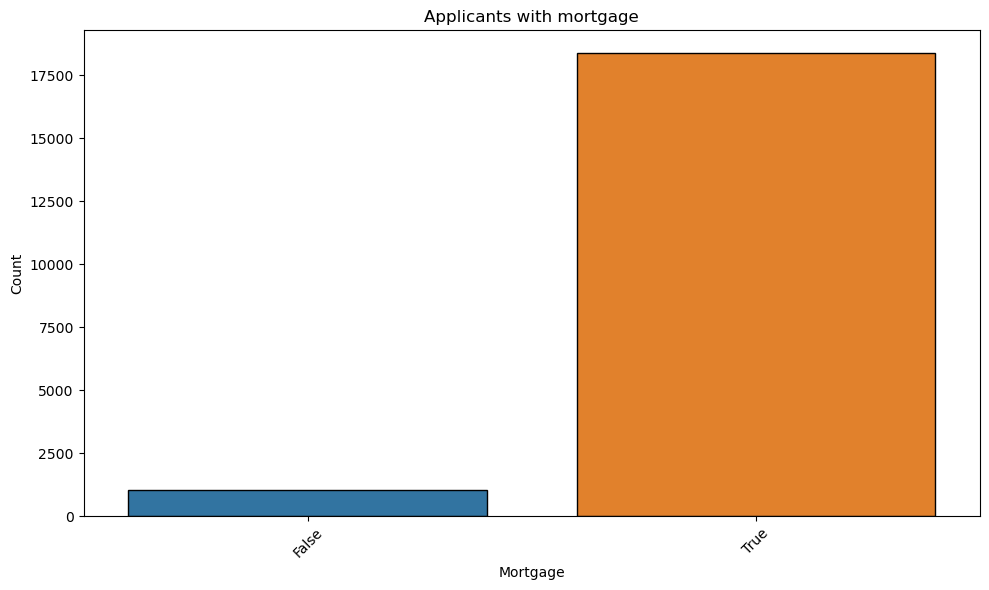

In [43]:
# Create a count plot for 'has_mortgage'.
plt.figure(figsize=(10, 6))
sns.countplot(data=apl, x='has_mortgage', edgecolor='black')
plt.xlabel('Mortgage') 
plt.ylabel('Count')
plt.title('Applicants with mortgage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a count plot for 'has_mortgage' without unknown.
filtered_apl = apl[apl['has_mortgage'] != 'unknown']
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_apl, x='has_mortgage', edgecolor='black')
plt.xlabel('Mortgage') 
plt.ylabel('Count')
plt.title('Applicants with mortgage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# Print counts for declared has mortgage.
print(apl['has_mortgage'].value_counts())

unknown    153541
True        18371
False        1048
Name: has_mortgage, dtype: int64


> Most applicants without declared information about mortgage.

In [45]:
# Print counts for declared monthly spending.
print(apl['monthly_spending'].value_counts())
print(apl['monthly_spending'].max())

500      15932
1000     15904
800      12067
600      11740
300      10868
         ...  
1385         1
616          1
1694         1
43431        1
1727         1
Name: monthly_spending, Length: 1308, dtype: int64
43431


> Top 5 most frequent applications with declared monthly spend =<1000 £.

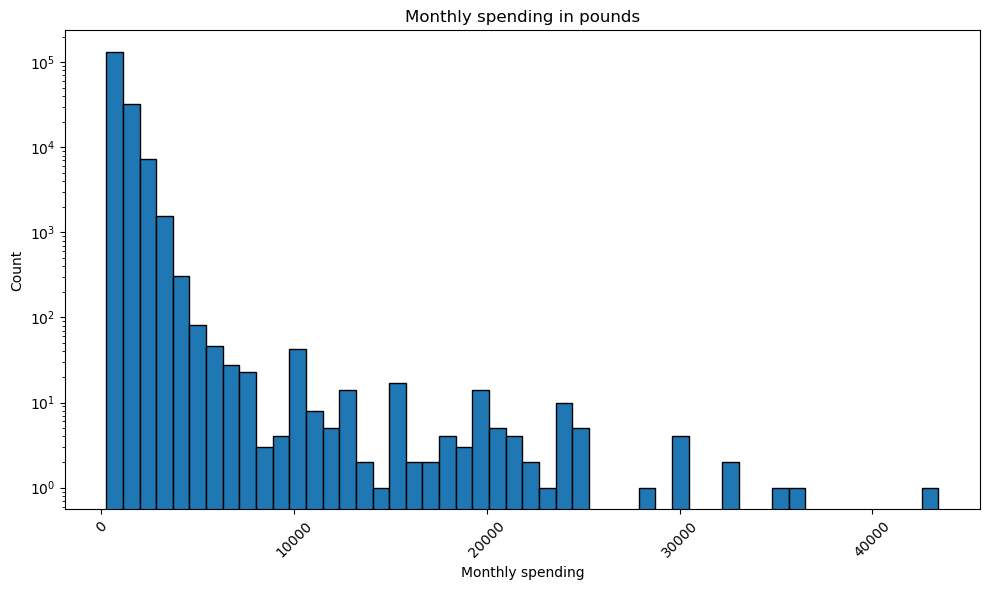

In [46]:
# Historgram for 'monthly_spending'.
plt.figure(figsize=(10, 6))
plt.hist(apl['monthly_spending'], bins=50, edgecolor='black', log=True)
plt.xlabel('Monthly spending')
plt.ylabel('Count')
plt.title('Monthly spending in pounds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

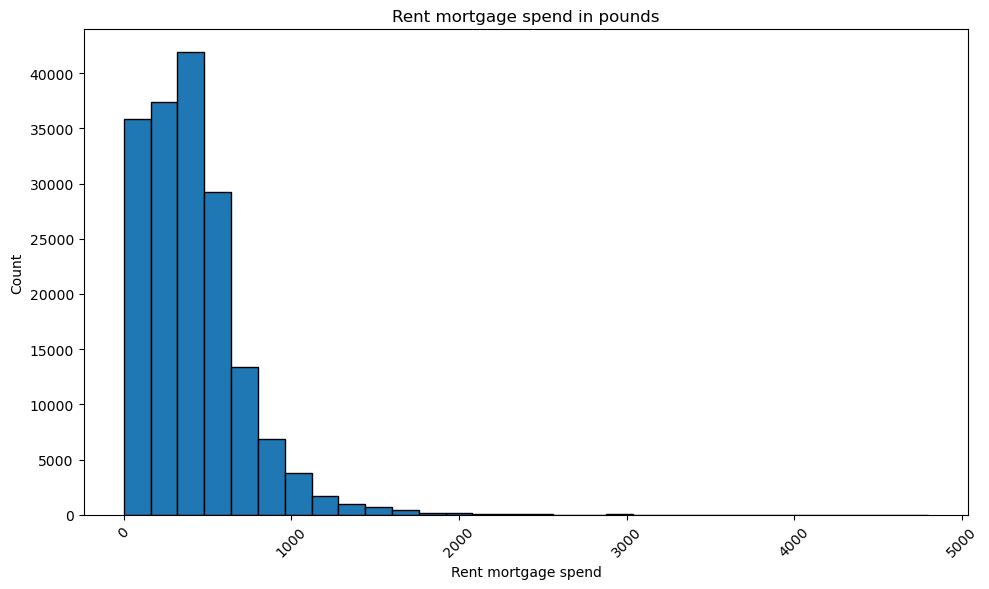

In [47]:
# Historgram for 'rent_mortgage_spend' filtered.
# Filter values below 5000.
apl_filtr = apl[apl['rent_mortgage_spend'] < 5000]

# Histogram for values below 5000 in 'rent_mortgage_spend'.
plt.figure(figsize=(10, 6))
plt.hist(apl_filtr['rent_mortgage_spend'], bins=30, edgecolor='black')
plt.xlabel('Rent mortgage spend')
plt.ylabel('Count')
plt.title('Rent mortgage spend in pounds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# Print counts for declared employment status.
apl['employment_status'].value_counts()

FT_EMPLOYED      142228
SELF_EMPLOYED     12730
PT_EMPLOYED        8929
UNEMPLOYED         3896
RETIRED            3398
WORK_AT_HOME       1004
STUDENT             775
Name: employment_status, dtype: int64

> 142228 (82%) applicants in full time employment. 142228/172960 = 0.822 | 82.2%

------------------------------

-----------------------

## Cleaning Data
#### Goals:
- Dependants spend over £80K (removes extreme outliers).
- Salary over £200k (removes extreme outliers).
- Duration requested over 60 months (MCF lend up to 60 months only).
- Amount of loan requested between £1500 and £25k (MCF maximal amount lend is £25k).
- Applicants with less than 18K Salary (MCF minimun is £18k).
- Monthly spending over than £4000 filtered out based on the descriptive statistics.
- Rent / Mortgage spend over £5000 filtered out based on the descriptive statistics.

### Dependants spend over £80K

In [49]:
# Remove outlier dependants spend (over £80k).
# Dependants spend.
dependants_spend = apl['dependants_spend']

# Calculate the number of entries with dependants spend over 80k.
over_80K = len(dependants_spend[dependants_spend > 80000])

# Calculate the total number of entries.
num_total_entries1 = len(dependants_spend)

# Calculate the percentage.
percentage = (over_80K / num_total_entries1) * 100

# Calculate the number of entries that would be removed.
num_removed_over80k = over_80K
print(f"Number of entries to be removed: {num_removed_over80k}")
print(f"Percentage of entries with dependants spend over £80k: {percentage:.2f}%")

Number of entries to be removed: 39
Percentage of entries with dependants spend over £80k: 0.02%


In [50]:
# Create a copy of DataFrame 'apl' by filtering for rows where 'dependants_spend' is not over 80k.
apl = apl[apl['dependants_spend'] <= 80000].copy()

# Show descriptive statistics.
apl.describe()

,amount_requested,duration_requested,annual_salary,dependant_number,dependants_spend,monthly_spending,rent_mortgage_spend,number_applications
count,172921.000000,172921.000000,1.729210e+05,172921.000000,172921.000000,172921.000000,172921.000000,172921.000000
mean,8498.376235,44.796132,8.706647e+04,0.728072,76.852603,894.240376,415.121443,14.198195
std,7684.335934,23.065095,5.256268e+06,1.057713,417.905315,755.519982,2684.211336,68.462097
min,1000.000000,12.000000,0.000000e+00,0.000000,0.000000,251.000000,0.000000,1.000000
25%,3000.000000,24.000000,2.189200e+04,0.000000,0.000000,500.000000,200.000000,1.000000
50%,6500.000000,48.000000,2.935000e+04,0.000000,0.000000,800.000000,373.000000,3.000000
75%,11000.000000,60.000000,4.000000e+04,1.000000,100.000000,1100.000000,540.000000,10.000000
max,100000.000000,240.000000,1.860020e+09,6.000000,60000.000000,43431.000000,830200.000000,918.000000


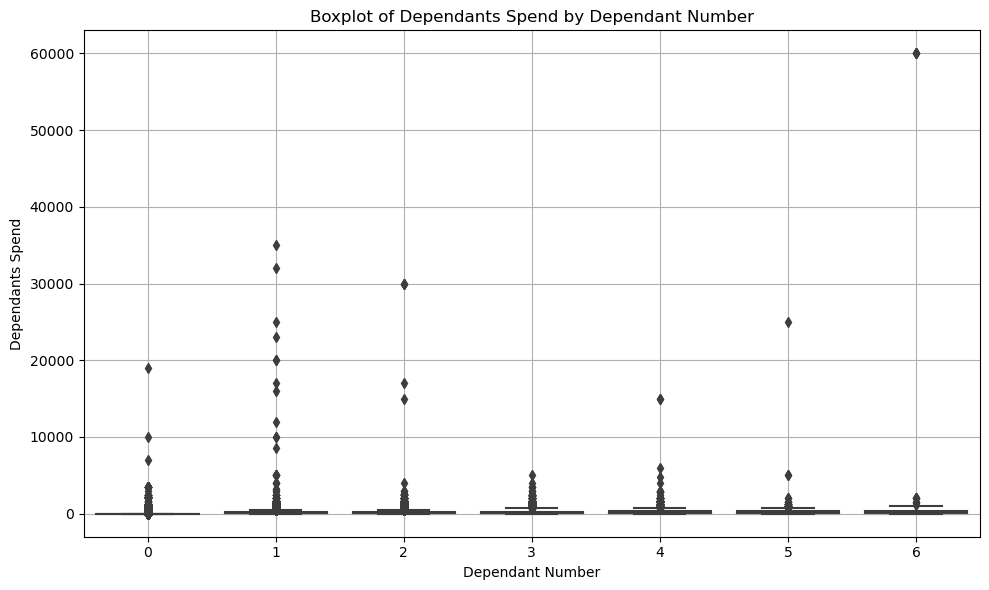

In [51]:
# Create a boxplot for 'Dependants Spend'
plt.figure(figsize=(10, 6))
sns.boxplot(data=apl, x='dependant_number', y='dependants_spend')
plt.title('Boxplot of Dependants Spend by Dependant Number')
plt.xlabel('Dependant Number')
plt.ylabel('Dependants Spend')
plt.grid(True)
plt.tight_layout()

# View the plot.
plt.show()

### Annual salary outliers

In [52]:
# Create variable Annual Salary.
annual_salary = apl['annual_salary']

# Calculate the number of entries with annual salary over 200k.
over_200k = len(annual_salary[annual_salary > 200000])

# Calculate the total number of entries.
num_total_entries2 = len(annual_salary)

# Calculate the percentage.
percentage = (over_200k / num_total_entries2) * 100

# Calculate the number of entries that would be removed.
num_removed_over200k = over_200k
print(f"Number of entries to be removed: {num_removed_over200k}")
print(f"Percentage of entries with annual salary over £200k: {percentage:.2f}%")

Number of entries to be removed: 408
Percentage of entries with annual salary over £200k: 0.24%


In [53]:
# Create a new DataFrame 'apl1' by filtering for rows where 'annual_salary' is not over 200k.
apl1 = apl[apl['annual_salary'] <= 200000].copy()

# Decriptive statistics.
apl1['annual_salary'].describe()

count    172513.000000
mean      32872.729922
std       18966.624215
min           0.000000
25%       21800.000000
50%       29221.000000
75%       40000.000000
max      200000.000000
Name: annual_salary, dtype: float64

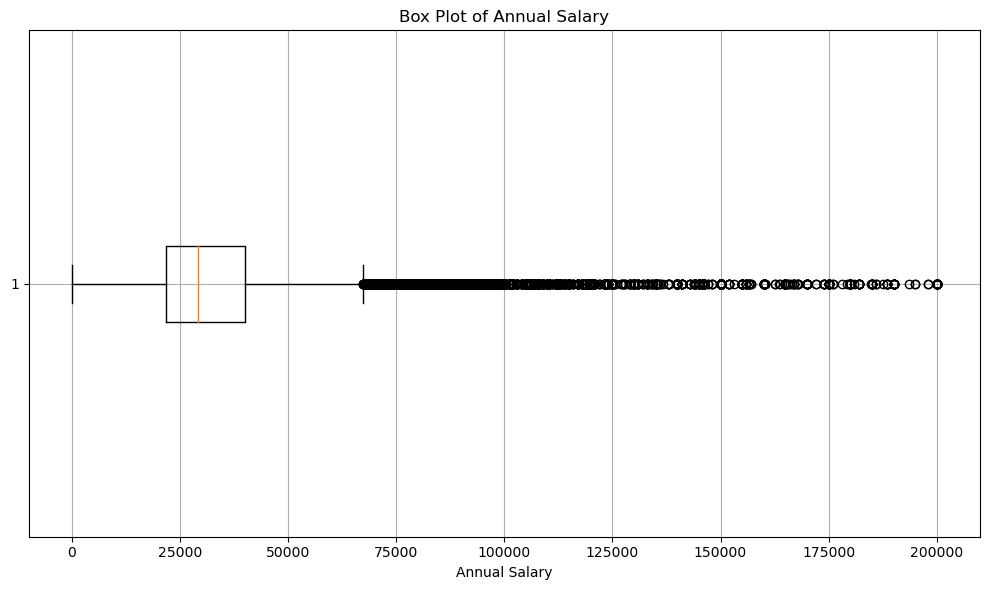

In [54]:
# Check boxplot for annual salary
annual_salary = apl1['annual_salary']

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(annual_salary, vert=False)
plt.title('Box Plot of Annual Salary')
plt.xlabel('Annual Salary')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

### Duration requested under 12 months or over 60 months

In [55]:
# Create a variable duration_requested.
duration_requested = apl1['duration_requested']

# Calculate the number of entries with duration requested over 60 or under 12.
num_over_60 = len(duration_requested[duration_requested > 60])
num_under_12 = len(duration_requested[duration_requested < 12])

# Calculate the total number of entries.
num_total_entries3 = len(duration_requested)

# Calculate the percentage.
percentage = (num_over_60 / num_total_entries3) * 100
percentage_12 = (num_under_12 / num_total_entries3) * 100

# Calculate the number of entries that would be removed.
num_removed = num_over_60
num_removed_12 = num_under_12

print(f"Number of entries with requests over 60 months to be removed: {num_removed}")
print(f"Percentage of entries with duration requested over 60: {percentage:.2f}%")
print(f"Number of entries with requests under 12 months to be removed: {num_removed_12}")
print(f"Percentage of entries with duration requested under 12 months: {percentage_12:.2f}%")

Number of entries with requests over 60 months to be removed: 16159
Percentage of entries with duration requested over 60: 9.37%
Number of entries with requests under 12 months to be removed: 0
Percentage of entries with duration requested under 12 months: 0.00%


> 16159 Applications over than 60 months. None requested a loan with less than 12 month duration.

In [56]:
# Filtering for rows where 'duration_requested' is not over 60.
apl2 = apl1[apl1['duration_requested'] <= 60].copy()

# Display apl2 head.
apl2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156354 entries, 137022 to 4699
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   uuid                 156354 non-null  object        
 1   date_created         156354 non-null  datetime64[ns]
 2   amount_requested     156354 non-null  int64         
 3   duration_requested   156354 non-null  int64         
 4   reason               156354 non-null  object        
 5   annual_salary        156354 non-null  int64         
 6   dependant_number     156354 non-null  int64         
 7   dependants_spend     156354 non-null  float64       
 8   has_mortgage         156354 non-null  object        
 9   monthly_spending     156354 non-null  int64         
 10  rent_mortgage_spend  156354 non-null  float64       
 11  employment_status    156354 non-null  object        
 12  number_applications  156354 non-null  int64         
dtypes: datetime

In [57]:
# Descriptive statistics
apl2['duration_requested'].describe()

count    156354.000000
mean         40.183200
std          17.117152
min          12.000000
25%          24.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: duration_requested, dtype: float64

### Loan amount requested under £1.5k or over 25k

In [58]:
# Create a variable amount_requested.
amount_requested = apl2['amount_requested']

# Calculate the number of entries with duration requested over 25,000 or under 1,500.
over_25k = len(amount_requested[amount_requested > 25000])
under_1500 = len(amount_requested[amount_requested < 1500])

# Calculate the total number of entries.
num_total_entries4 = len(amount_requested)

# Calculate the percentage.
percentage = (over_25k / num_total_entries4) * 100
percentage1500 = (under_1500 / num_total_entries4) * 100

# Calculate the number of entries that would be removed.
num_removed25 = over_25k
print(f"Number of entries to be removed: {num_removed25}")
print(f"Percentage of entries with amount requested over £25k: {percentage:.2f}%")
num_removed1500 = under_1500
print(f"Number of entries to be removed: {num_removed1500}")
print(f"Percentage of entries with amount requested under £1.5k: {percentage1500:.2f}%")

Number of entries to be removed: 1888
Percentage of entries with amount requested over £25k: 1.21%
Number of entries to be removed: 19053
Percentage of entries with amount requested under £1.5k: 12.19%


> 19053 Applications for less than £1500. Maybe a good business opportunity for micro loan.

In [59]:
#Filtering for rows where 'amount_requested' is less than £1.5k not over £25k.
apl3 = apl2[(apl2['amount_requested'] <= 25000) & (apl2['amount_requested'] >= 1500)].copy()

# Descriptive statistics.
apl3.describe()

,amount_requested,duration_requested,annual_salary,dependant_number,dependants_spend,monthly_spending,rent_mortgage_spend,number_applications
count,135413.000000,135413.000000,135413.000000,135413.000000,135413.000000,135413.000000,135413.000000,135413.000000
mean,8180.287476,42.884760,33858.034797,0.705619,73.908798,899.642885,410.252664,16.585121
std,5410.213210,15.842669,19000.309877,1.042463,305.493479,723.935711,1481.259662,76.942959
min,1500.000000,12.000000,0.000000,0.000000,0.000000,251.000000,0.000000,1.000000
25%,4000.000000,30.000000,22500.000000,0.000000,0.000000,500.000000,200.000000,2.000000
50%,7000.000000,48.000000,30000.000000,0.000000,0.000000,800.000000,379.000000,4.000000
75%,10000.000000,60.000000,40000.000000,1.000000,90.000000,1110.000000,550.000000,11.000000
max,25000.000000,60.000000,200000.000000,6.000000,35000.000000,43431.000000,495520.000000,918.000000


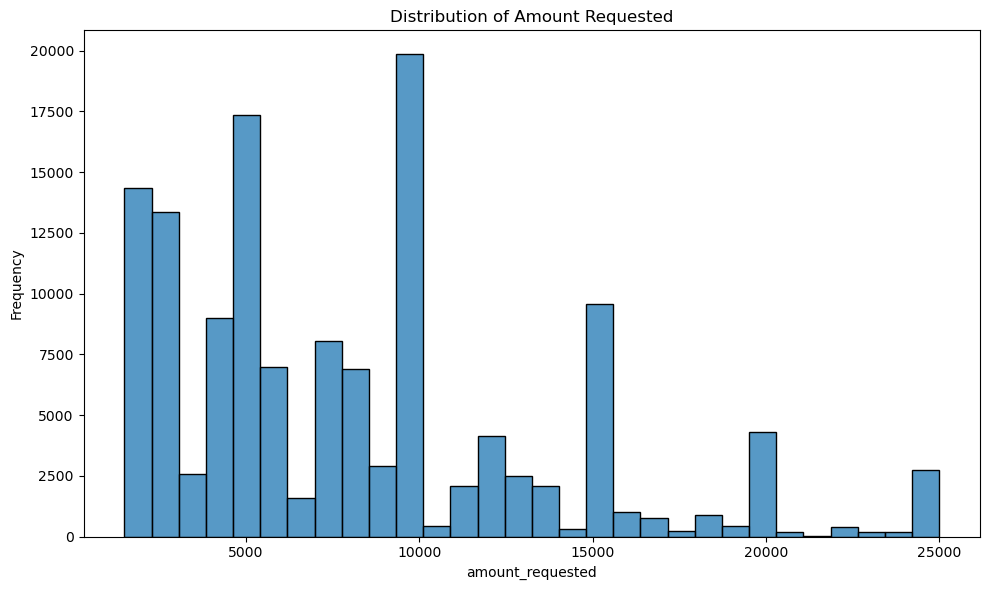

In [60]:
# Plot a histogram for amount_requested.
plt.figure(figsize=(10, 6))
sns.histplot(apl3['amount_requested'], bins=30)
plt.title('Distribution of Amount Requested')
plt.ylabel('Amount Requested')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Salary is under £18k

In [61]:
# Create a variable with Annual Salary below 18,000.
annual_salary_less_18K = apl3['annual_salary']

# Calculate the number of entries with annual salary under 18,000.
under_18k = len(annual_salary_less_18K[annual_salary_less_18K < 18000])

# Calculate the total number of entries.
num_total_entries5 = len(annual_salary_less_18K)

# Calculate the percentage.
percentage = (under_18k / num_total_entries5) * 100

# Calculate the number of entries that would be removed.
num_removed18 = under_18k
print(f"Number of entries to be removed: {num_removed18}")
print(f"Percentage of entries with annual salary under £18k: {percentage:.2f}%")

Number of entries to be removed: 15254
Percentage of entries with annual salary under £18k: 11.26%


In [62]:
#Filtering for rows where Annual Salary is less than 18,000.
apl4 = apl3[apl3['annual_salary'] >= 18000].copy()

# # Removed rows where Annual Salary is less than 18,000.
apl4.describe()

,amount_requested,duration_requested,annual_salary,dependant_number,dependants_spend,monthly_spending,rent_mortgage_spend,number_applications
count,120159.000000,120159.000000,120159.000000,120159.000000,120159.000000,120159.000000,120159.000000,120159.000000
mean,8475.655024,43.340574,36659.630939,0.698566,75.067444,936.205952,429.475287,18.284140
std,5476.523413,15.753984,18281.989298,1.034275,292.126322,718.827152,1502.654439,81.505056
min,1500.000000,12.000000,18000.000000,0.000000,0.000000,251.000000,0.000000,1.000000
25%,4000.000000,30.000000,25000.000000,0.000000,0.000000,500.000000,230.000000,2.000000
50%,7500.000000,48.000000,32000.000000,0.000000,0.000000,800.000000,400.000000,4.000000
75%,11000.000000,60.000000,42000.000000,1.000000,100.000000,1200.000000,567.000000,13.000000
max,25000.000000,60.000000,200000.000000,6.000000,32000.000000,43431.000000,495520.000000,918.000000


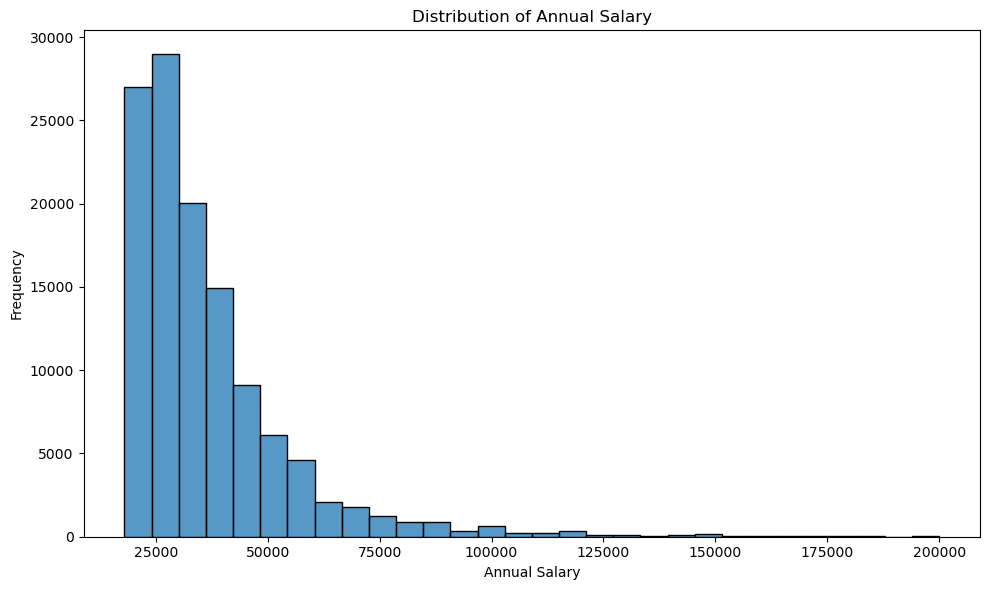

In [63]:
# Plot a histogram for annual_salary.
plt.figure(figsize=(10, 6))
sns.histplot(apl4['annual_salary'], bins=30)
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Monthly spending over than £4000

In [64]:
# Descriptive statistics of monthly_spending.
apl4['monthly_spending'].describe()

count    120159.000000
mean        936.205952
std         718.827152
min         251.000000
25%         500.000000
50%         800.000000
75%        1200.000000
max       43431.000000
Name: monthly_spending, dtype: float64

In [65]:
# Remove outlier monthly_spending (over £4000).
# Create a variable for monthly_spending.
monthly_spending = apl4['monthly_spending']

# Calculate the number of entries with monthly_spending over £4000.
over_4000 = len(monthly_spending[monthly_spending > 4000])

# Calculate the total number of entries.
num_total_entries6 = len(monthly_spending)

# Calculate the percentage.
percentage = (over_4000 / num_total_entries6) * 100

# Calculate the number of entries that would be removed.
num_removed_over4000 = over_4000
print(f"Number of entries to be removed: {num_removed_over4000}")
print(f"Percentage of entries with monthly_spending over £4000: {percentage:.2f}%")

Number of entries to be removed: 247
Percentage of entries with monthly_spending over £4000: 0.21%


In [66]:
# Filter for rows where Monthly Spending is less than £4000.
apl5 = apl4[apl4['monthly_spending'] <= 4000].copy()

# View descriptive statistics.
apl5.describe()

,amount_requested,duration_requested,annual_salary,dependant_number,dependants_spend,monthly_spending,rent_mortgage_spend,number_applications
count,119912.000000,119912.000000,119912.000000,119912.000000,119912.000000,119912.000000,119912.000000,119912.000000
mean,8470.017446,43.344186,36584.526228,0.697753,74.178723,919.393030,428.382506,18.313680
std,5473.369643,15.750609,18057.105222,1.033835,285.234635,546.486019,1503.459588,81.585428
min,1500.000000,12.000000,18000.000000,0.000000,0.000000,251.000000,0.000000,1.000000
25%,4000.000000,30.000000,25000.000000,0.000000,0.000000,500.000000,230.000000,2.000000
50%,7500.000000,48.000000,32000.000000,0.000000,0.000000,800.000000,400.000000,4.000000
75%,11000.000000,60.000000,42000.000000,1.000000,100.000000,1200.000000,566.000000,13.000000
max,25000.000000,60.000000,200000.000000,6.000000,32000.000000,4000.000000,495520.000000,918.000000


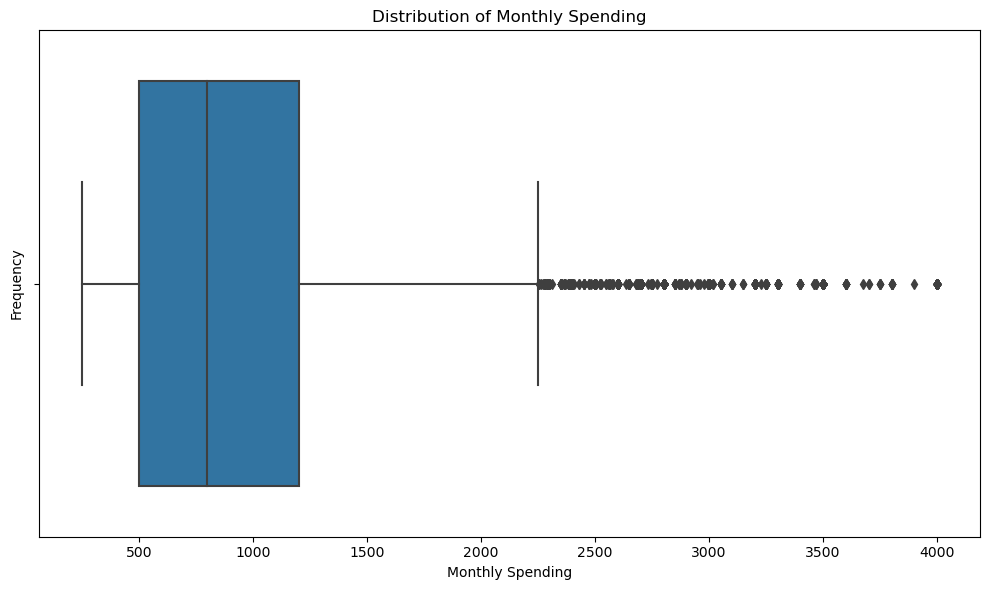

In [67]:
# Plot a boxplot for monthly spending.
plt.figure(figsize=(10, 6))
sns.boxplot(x=apl5['monthly_spending'])
plt.title('Distribution of Monthly Spending')
plt.xlabel('Monthly Spending')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Rent / Mortgage outliers

In [68]:
# Descriptive statistics of rent_mortgage_spend.
print(apl5['rent_mortgage_spend'].describe())

count    119912.000000
mean        428.382506
std        1503.459588
min           0.000000
25%         230.000000
50%         400.000000
75%         566.000000
max      495520.000000
Name: rent_mortgage_spend, dtype: float64


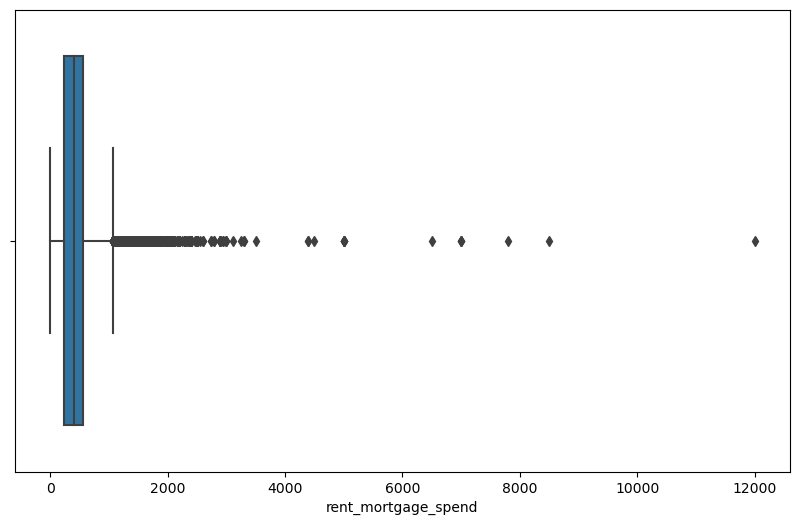

In [69]:
# Filter out the extreme outliers of rent_mortgage_spend to show on boxplot.
filtered_data = apl5[apl5['rent_mortgage_spend'] < 20000]

# Create the boxplot.
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['rent_mortgage_spend'])
plt.show()

In [70]:
# Remove outliers of rent/mortgage spend (over £5000).
# Create a variable rent_mortgaage_spend.
rent_mortgage_spend = apl5['rent_mortgage_spend']

# Calculate the number of entries with rent_mortgage_spend over £5000.
over_5000 = len(rent_mortgage_spend[rent_mortgage_spend > 5000])

# Calculate the total number of entries.
num_total_entries7 = len(rent_mortgage_spend)

# Calculate the percentage.
percentage = (over_5000 / num_total_entries7) * 100

# Calculate the number of entries that would be removed.
num_removed_over5000 = over_5000
print(f"Number of entries to be removed: {num_removed_over4000}")
print(f"Percentage of entries with rent_mortgage_spend over £5000: {percentage:.2f}%")

Number of entries to be removed: 247
Percentage of entries with rent_mortgage_spend over £5000: 0.01%


In [71]:
# Filtering for rows where mothly rent/mortgage spend is less than £5000.
apl6 = apl5[apl5['rent_mortgage_spend'] <= 5000].copy()

# Show descriptive statistics.
apl6.describe()

,amount_requested,duration_requested,annual_salary,dependant_number,dependants_spend,monthly_spending,rent_mortgage_spend,number_applications
count,119897.000000,119897.000000,119897.000000,119897.000000,119897.000000,119897.000000,119897.000000,119897.000000
mean,8469.966154,43.345004,36584.993027,0.697807,74.178053,919.380960,421.360751,18.315696
std,5473.325392,15.750054,18057.730326,1.033861,285.245976,546.496944,304.839666,81.590331
min,1500.000000,12.000000,18000.000000,0.000000,0.000000,251.000000,0.000000,1.000000
25%,4000.000000,30.000000,25000.000000,0.000000,0.000000,500.000000,230.000000,2.000000
50%,7500.000000,48.000000,32000.000000,0.000000,0.000000,800.000000,400.000000,4.000000
75%,11000.000000,60.000000,42000.000000,1.000000,100.000000,1200.000000,565.000000,13.000000
max,25000.000000,60.000000,200000.000000,6.000000,32000.000000,4000.000000,5000.000000,918.000000


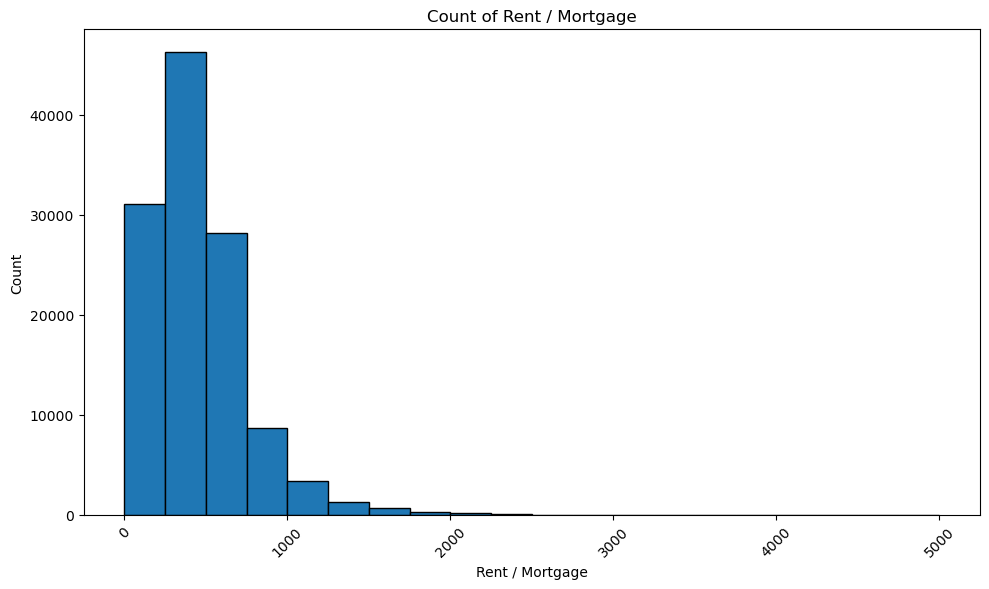

In [72]:
# Historgram for 'rent_mortgage_spend'.
plt.figure(figsize = (10, 6))
plt.hist(apl6['rent_mortgage_spend'], bins=20, edgecolor='black')
plt.xlabel('Rent / Mortgage')
plt.ylabel('Count')
plt.title('Count of Rent / Mortgage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Duplicates

In [73]:
# Check for duplicates.
duplicates_uuid = apl6['uuid'].duplicated()

# Number of duplicates.
num_duplicates_uuid = duplicates_uuid.sum()

# View the result.
print('Number of duplicates:', num_duplicates_uuid)

Number of duplicates: 72520


In [74]:
# Drop duplicate rows based on the 'uuid' column.
apl6 = apl6.drop_duplicates(subset='uuid', keep='first')

# Check the data shape.
apl6.shape

(47377, 13)

In [75]:
# Recheck for duplicates after droping
duplicates_uuid_2 = apl6['uuid'].duplicated()

# Number of duplicates.
num_duplicates_uuid_2 = duplicates_uuid_2.sum()

# View the result.
print('Number of duplicates after dropping:', num_duplicates_uuid_2)

Number of duplicates after dropping: 0


---------------------------

### Calculate taxes

In [76]:
# Calculate taxes.
def calculate_tax(annual_salary):
    if annual_salary <= 12570:
        tax = 0
    elif annual_salary <= 50270:
        tax = (annual_salary - 12570) * 0.20
    elif annual_salary <= 137710:
        tax = (50270 - 12570) * 0.20 + (annual_salary - 50270) * 0.40
    else:
        tax = (50270 - 12570) * 0.20 + (137710 - 50270) * 0.40 + (annual_salary - 137710) * 0.45
    return tax

# Add column 'tax' and 'net salary' to apl6.
apl6['tax'] = apl6['annual_salary'].apply(calculate_tax)
apl6['net_salary'] = apl6['annual_salary'] - apl6['tax']

> We calculated the taxes based on GOV.UK website https://www.gov.uk/guidance/rates-and-thresholds-for-employers-2023-to-2024
- Tax-free allowance is £12,570
- Basic tax rate	20%	Up to £37,700 
- Higher tax rate	40%	From £37,701 to £125,140 
- Additional tax rate	45%	Above £125,140

In [77]:
# Convert annual salary to monthly earnings and add a column 'monthly_earnings'.
apl6['monthly_earnings'] = apl6['net_salary']/12

# Create df_afford with all columns.
df_afford = apl6.copy()

# View the output.
df_afford.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status,number_applications,tax,net_salary,monthly_earnings
137022,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0,0.0,unknown,270,0.0,FT_EMPLOYED,22,1486.0,18514.0,1542.833333
144097,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0,0.0,unknown,500,0.0,FT_EMPLOYED,3,16432.0,56068.0,4672.333333
144094,bea58f63-92cb-4820-88e6-4f74d0187a93,2021-10-31,5000,36,debt,60000,3,500.0,unknown,1000,900.0,FT_EMPLOYED,8,11432.0,48568.0,4047.333333
144086,d8c5c75e-a5d0-462c-b6aa-634877364f74,2021-10-31,10000,60,debt,38079,1,400.0,unknown,1000,350.0,FT_EMPLOYED,13,5101.8,32977.2,2748.100000
144085,84057cd9-930f-469f-962b-711196323a15,2021-10-31,10000,48,vehicle,34500,0,0.0,unknown,1400,775.0,FT_EMPLOYED,6,4386.0,30114.0,2509.500000


---------------

### Clustering for Monthly spending and Monthly earnings

In [78]:
# Drop unnecessary columns.
monthly_cluster = df_afford[['monthly_spending', 'monthly_earnings']]

# View the result.
monthly_cluster.head()

,monthly_spending,monthly_earnings
137022,270,1542.833333
144097,500,4672.333333
144094,1000,4047.333333
144086,1000,2748.100000
144085,1400,2509.500000


In [79]:
# Descriptive statistics.
monthly_cluster.describe()

,monthly_spending,monthly_earnings
count,47377.000000,47377.000000
mean,920.861262,2519.992346
std,543.476750,1029.089475
min,251.000000,1409.500000
25%,500.000000,1809.500000
50%,800.000000,2209.500000
75%,1200.000000,2876.166667
max,4000.000000,10787.791667


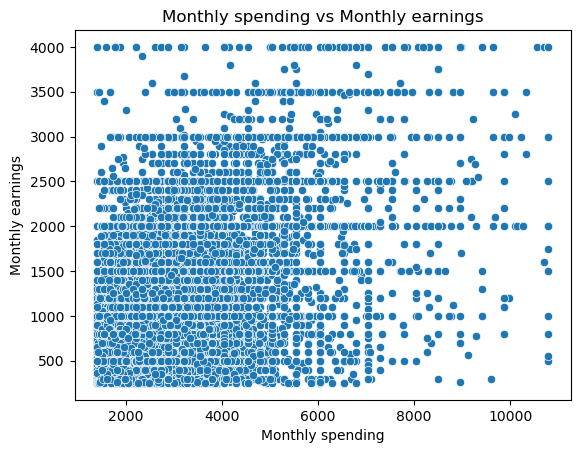

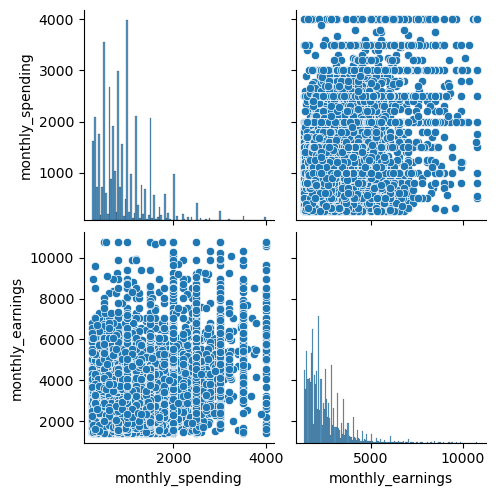

In [80]:
# Create a scatterplot monthly spending versus monthly earnings.
sns.scatterplot(data=monthly_cluster,x=monthly_cluster['monthly_earnings'],
                y=monthly_cluster['monthly_spending'])
plt.xlabel('Monthly spending')
plt.ylabel('Monthly earnings')
plt.title('Monthly spending vs Monthly earnings')
plt.show()

# Create a pairplot with Seaborn.
sns.pairplot(data=monthly_cluster)
plt.show()

### Elbow and silhoutte methods

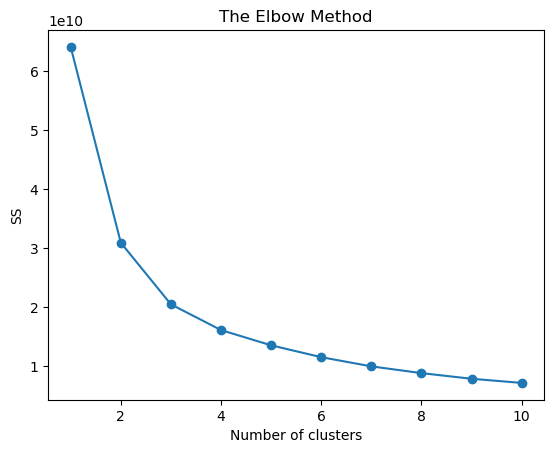

In [81]:
# Determine the number of clusters using Elbow method.
# Specify X
x = monthly_cluster[['monthly_earnings','monthly_spending']]

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

# View the plot.
plt.show()

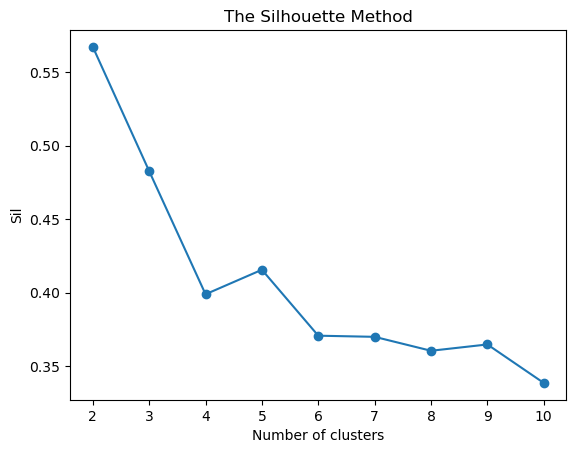

In [82]:
# Determine the number of clusters using Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

# View the plot.
plt.show()

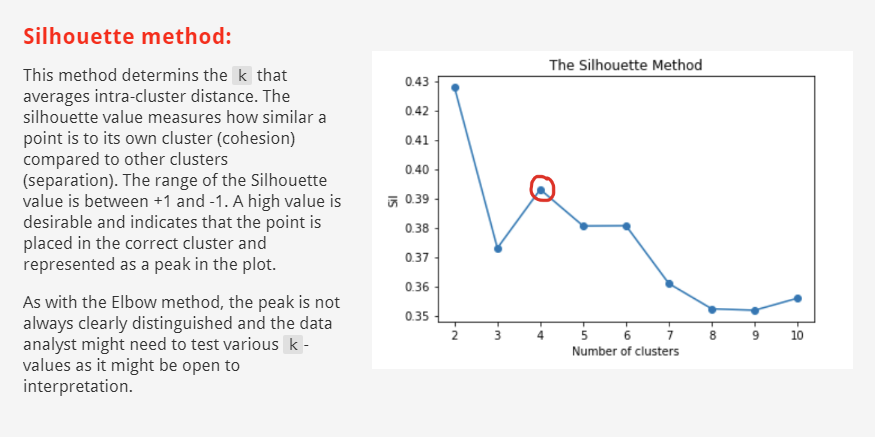

#### Set k=5 Clusters

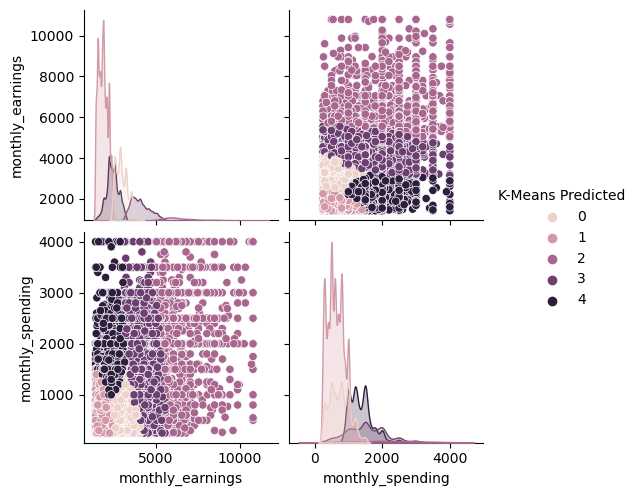

1    22873
0     9563
4     8606
3     5299
2     1036
Name: K-Means Predicted, dtype: int64
        monthly_earnings  monthly_spending  K-Means Predicted
137022       1542.833333               270                  1
144097       4672.333333               500                  3
144094       4047.333333              1000                  3
144086       2748.100000              1000                  0
144085       2509.500000              1400                  4


In [83]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Show the plot.
plt.show()

# Check the number of observations per predicted class.
print(x['K-Means Predicted'].value_counts())

# View the K-Means predicted.
print(x.head())

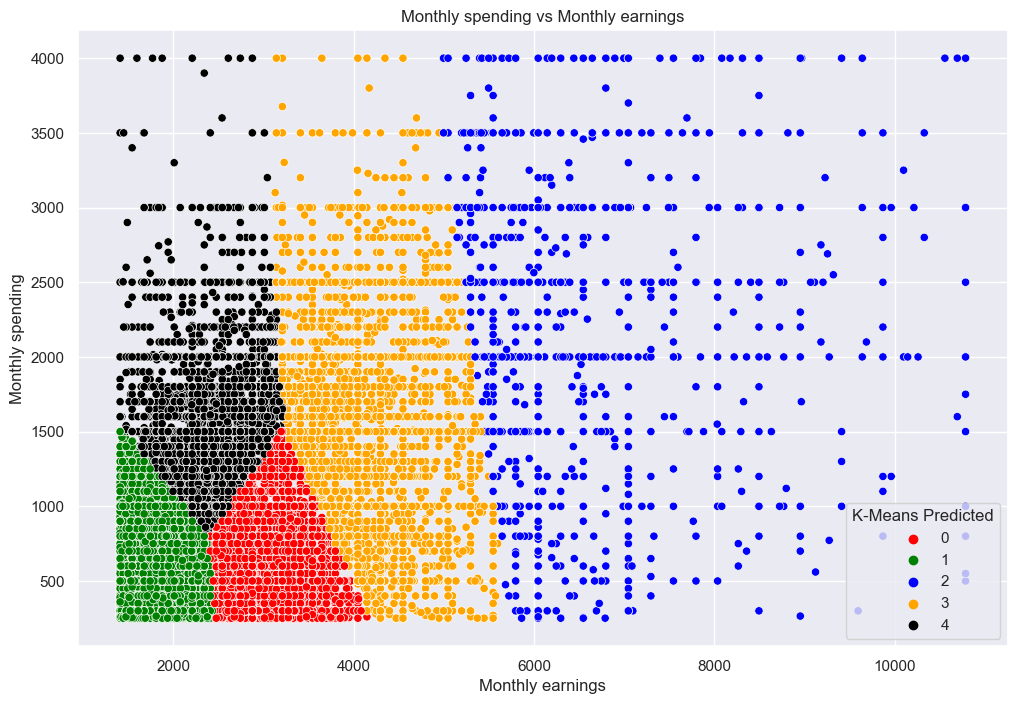

In [84]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='monthly_earnings' , 
                y ='monthly_spending',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange', 'black'])

plt.xlabel('Monthly earnings')
plt.ylabel('Monthly spending')
plt.title('Monthly spending vs Monthly earnings')

# View the plot.
plt.show()

In [85]:
# Add a column with cluster number.
df_afford['clusters'] = clusters

> Distribution in each cluster.
> - Cluster(0):    8082
> - Cluster(1):    24029
> - Cluster(2):    9220
> - Cluster(3):    1011
> - Cluster(4):    5036

> Based on the Elbow and Silhouette method, we get a confident decision that 5 clusters are most appropriate.
We can consider the black cluster (4) as high risk because it groups applicants with a low income and high spending attitude.

------------------------------

-------------------

# Calculate PMT

In [86]:
# Install Financial.
# !pip install numpy_financial
import numpy_financial as npf

In [87]:
# Calculate disposable income.
df_afford['disposable_income'] = df_afford['monthly_earnings']- (df_afford['dependants_spend'] + 
                                                                 df_afford['monthly_spending'] + df_afford['rent_mortgage_spend'])

# Descriptive statistics
df_afford['disposable_income'].describe()

count    47377.000000
mean      1101.213086
std        951.952419
min     -32670.500000
25%        566.166667
50%       1025.166667
75%       1532.500000
max       9587.791667
Name: disposable_income, dtype: float64

In [88]:
# Create a new column with rejected applicants (True or False).
df_afford['rejected'] = df_afford['disposable_income'] < 0

# View dataframe.
df_afford.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status,number_applications,tax,net_salary,monthly_earnings,clusters,disposable_income,rejected
137022,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0,0.0,unknown,270,0.0,FT_EMPLOYED,22,1486.0,18514.0,1542.833333,1,1272.833333,False
144097,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0,0.0,unknown,500,0.0,FT_EMPLOYED,3,16432.0,56068.0,4672.333333,3,4172.333333,False
144094,bea58f63-92cb-4820-88e6-4f74d0187a93,2021-10-31,5000,36,debt,60000,3,500.0,unknown,1000,900.0,FT_EMPLOYED,8,11432.0,48568.0,4047.333333,3,1647.333333,False
144086,d8c5c75e-a5d0-462c-b6aa-634877364f74,2021-10-31,10000,60,debt,38079,1,400.0,unknown,1000,350.0,FT_EMPLOYED,13,5101.8,32977.2,2748.100000,0,998.100000,False
144085,84057cd9-930f-469f-962b-711196323a15,2021-10-31,10000,48,vehicle,34500,0,0.0,unknown,1400,775.0,FT_EMPLOYED,6,4386.0,30114.0,2509.500000,4,334.500000,False


In [89]:
# Check number of rejected people.
df_afford['rejected'].value_counts()

False    44122
True      3255
Name: rejected, dtype: int64

> 3255 applicants were found with no disposable income (declared spending higher than montlhy earnings) and rejected on this ground.

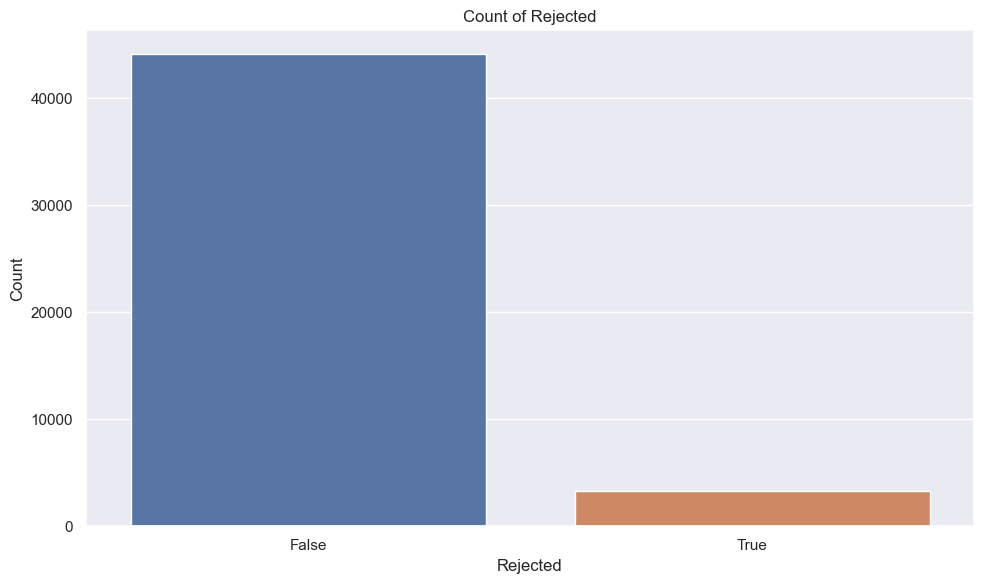

In [90]:
# Create a histogram with rejected column.
plt.figure(figsize=(10, 6))
sns.countplot(x=df_afford['rejected'])
plt.xlabel('Rejected')
plt.ylabel('Count')
plt.title('Count of Rejected')
plt.tight_layout()

# View the plot.
plt.show()

In [91]:
# Insert PA interest rate.
df_afford['interest_rate'] = 0.222

# Insert variables.
r = df_afford['interest_rate']
n = df_afford['duration_requested']
P = df_afford['amount_requested']

In [92]:
# Apply PMT function to defined values.
df_afford['repayment'] = npf.pmt(r / 12, n, -P)

# View the output.
df_afford.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,...,employment_status,number_applications,tax,net_salary,monthly_earnings,clusters,disposable_income,rejected,interest_rate,repayment
137022,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0,0.0,unknown,270,...,FT_EMPLOYED,22,1486.0,18514.0,1542.833333,1,1272.833333,False,0.222,126.459028
144097,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0,0.0,unknown,500,...,FT_EMPLOYED,3,16432.0,56068.0,4672.333333,3,4172.333333,False,0.222,181.919407
144094,bea58f63-92cb-4820-88e6-4f74d0187a93,2021-10-31,5000,36,debt,60000,3,500.0,unknown,1000,...,FT_EMPLOYED,8,11432.0,48568.0,4047.333333,3,1647.333333,False,0.222,191.469984
144086,d8c5c75e-a5d0-462c-b6aa-634877364f74,2021-10-31,10000,60,debt,38079,1,400.0,unknown,1000,...,FT_EMPLOYED,13,5101.8,32977.2,2748.100000,0,998.100000,False,0.222,277.327456
144085,84057cd9-930f-469f-962b-711196323a15,2021-10-31,10000,48,vehicle,34500,0,0.0,unknown,1400,...,FT_EMPLOYED,6,4386.0,30114.0,2509.500000,4,334.500000,False,0.222,316.147570


> PMT function matches completely with MCF website.

In [93]:
# Calculate if disposable income is greater than calculated repayments.
df_afford['income_after_repay'] = df_afford['disposable_income'] - df_afford['repayment']

# View the result.
df_afford.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,...,number_applications,tax,net_salary,monthly_earnings,clusters,disposable_income,rejected,interest_rate,repayment,income_after_repay
137022,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0,0.0,unknown,270,...,22,1486.0,18514.0,1542.833333,1,1272.833333,False,0.222,126.459028,1146.374305
144097,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0,0.0,unknown,500,...,3,16432.0,56068.0,4672.333333,3,4172.333333,False,0.222,181.919407,3990.413927
144094,bea58f63-92cb-4820-88e6-4f74d0187a93,2021-10-31,5000,36,debt,60000,3,500.0,unknown,1000,...,8,11432.0,48568.0,4047.333333,3,1647.333333,False,0.222,191.469984,1455.863349
144086,d8c5c75e-a5d0-462c-b6aa-634877364f74,2021-10-31,10000,60,debt,38079,1,400.0,unknown,1000,...,13,5101.8,32977.2,2748.100000,0,998.100000,False,0.222,277.327456,720.772544
144085,84057cd9-930f-469f-962b-711196323a15,2021-10-31,10000,48,vehicle,34500,0,0.0,unknown,1400,...,6,4386.0,30114.0,2509.500000,4,334.500000,False,0.222,316.147570,18.352430


In [94]:
# Add results of people with negative income_after_repay to the "rejected" column.
df_afford['rejected'] = df_afford['income_after_repay'] < 0

# View the dataframe.
df_afford.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,...,number_applications,tax,net_salary,monthly_earnings,clusters,disposable_income,rejected,interest_rate,repayment,income_after_repay
137022,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0,0.0,unknown,270,...,22,1486.0,18514.0,1542.833333,1,1272.833333,False,0.222,126.459028,1146.374305
144097,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0,0.0,unknown,500,...,3,16432.0,56068.0,4672.333333,3,4172.333333,False,0.222,181.919407,3990.413927
144094,bea58f63-92cb-4820-88e6-4f74d0187a93,2021-10-31,5000,36,debt,60000,3,500.0,unknown,1000,...,8,11432.0,48568.0,4047.333333,3,1647.333333,False,0.222,191.469984,1455.863349
144086,d8c5c75e-a5d0-462c-b6aa-634877364f74,2021-10-31,10000,60,debt,38079,1,400.0,unknown,1000,...,13,5101.8,32977.2,2748.100000,0,998.100000,False,0.222,277.327456,720.772544
144085,84057cd9-930f-469f-962b-711196323a15,2021-10-31,10000,48,vehicle,34500,0,0.0,unknown,1400,...,6,4386.0,30114.0,2509.500000,4,334.500000,False,0.222,316.147570,18.352430


In [95]:
# Count bumber of rejected people.
df_afford['rejected'].value_counts()

False    41037
True      6340
Name: rejected, dtype: int64

> The 'rejected' number of applicants increased by 3,085.

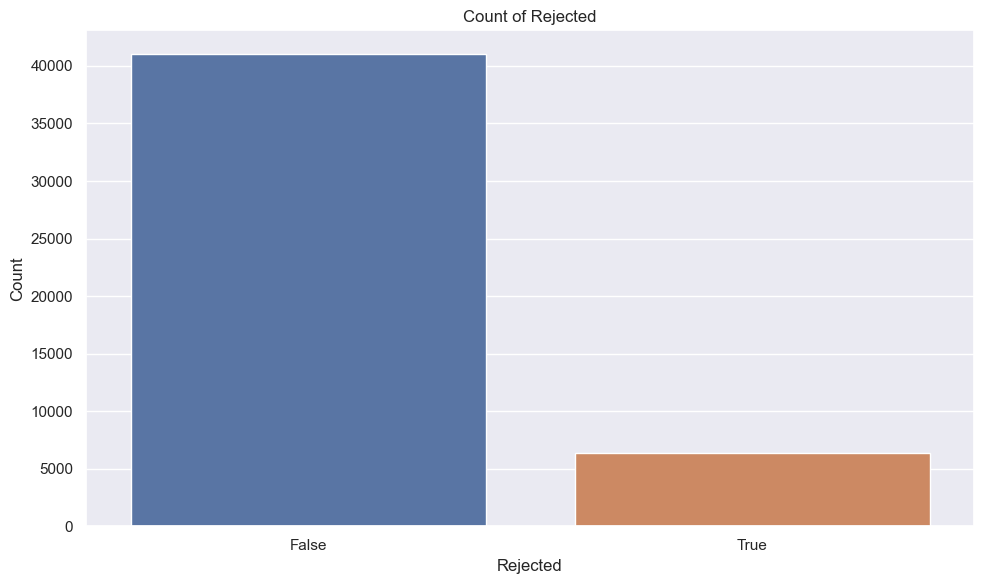

In [96]:
# Create a histogram with rejected column
plt.figure(figsize=(10, 6))
sns.countplot(x=df_afford['rejected'])
plt.xlabel('Rejected')
plt.ylabel('Count')
plt.title('Count of Rejected')
plt.tight_layout()

# View the plot.
plt.show()

----------------

## Merge applicant and bureau datasets

In [97]:
# Convert the 'date_created' column in bureau dataset to datetime format.
df_bru['date_created'] = pd.to_datetime(df_bru['date_created'],  format='%d/%m/%Y')

# Find the first and last date in the dataset.
first_date = df_bru['date_created'].min()
last_date = df_bru['date_created'].max()

# Show the result.
print(first_date)
print(last_date)

2020-11-02 00:00:00
2021-10-31 00:00:00


In [98]:
# Sort applicantion loan data in bureau dataset by date in descending order.
df_bru.sort_values(by=['date_created'], ascending=False, inplace=True)

# View the result.
df_bru.head()

,uuid,date_created,new_to_credit_on_date_created,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
141383,9217971d-0fd3-43af-af4f-c3412ba8a1ee,2021-10-31,0,35000.0,30000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85061,47b8f5cb-2f38-4f75-b1b8-1fc188cba610,2021-10-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50844,ad9164a4-952a-44ce-9f8b-e7a61654f875,2021-10-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125081,49ba14a4-9ce7-4048-81e8-1a001ba49a6d,2021-10-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40699,1bf9d6ff-ed5d-48ac-a2a1-f38f362ca554,2021-10-31,0,35000.0,30000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


----------

> Remove annual salary extreme outliers (above 200000) in bureau dataset following the same conditions as for applicant dataset.

In [99]:
# Create a variable with Salary Bands.
salary_band_5000s = df_bru['salary_band_5000s']

# Calculate the number of entries with annual salary over 200k.
salary_over_200k = len(salary_band_5000s[salary_band_5000s > 200000])

# Calculate the total number of entries.
num_total_entries2 = len(salary_band_5000s)

# Calculate the percentage.
percentage = (salary_over_200k / num_total_entries2) * 100

# Calculate the number of entries that would be removed.
num_removed_over200k = salary_over_200k

# Show the result.
print(f"Number of entries to be removed: {num_removed_over200k}")
print(f"Percentage of entries with salary band 5000s over £200k: {percentage:.2f}%")

# Create a new DataFrame 'apl1' by filtering for rows where 'annual_salary' is not over 200k.
df_bru1 = df_bru[df_bru['salary_band_5000s'] <= 200000].copy()

# Decriptive statistics.
df_bru1['salary_band_5000s'].describe()

Number of entries to be removed: 133
Percentage of entries with salary band 5000s over £200k: 0.09%


count     55176.000000
mean      35311.095404
std       20392.738852
min           0.000000
25%       25000.000000
50%       30000.000000
75%       40000.000000
max      200000.000000
Name: salary_band_5000s, dtype: float64

In [100]:
# Salary Band.
salary_band_10000s = df_bru['salary_band_10000s']

# Calculate the number of entries with annual salary over 200k.
salary_over_200k_2 = len(salary_band_10000s[salary_band_10000s > 200000])

# Calculate the total number of entries.
num_total_entries3 = len(salary_band_10000s)

# Calculate the percentage.
percentage_2 = (salary_over_200k_2 / num_total_entries3) * 100

# Calculate the number of entries that would be removed.
num_removed_over200k_2 = salary_over_200k_2

# Show the result.
print(f"Number of entries to be removed: {num_removed_over200k_2}")
print(f"Percentage of entries with salary band 10000s over £200k: {percentage_2:.2f}%")

# Create a new DataFrame 'df_bru1' by filtering for rows where 'annual_salary' is not over 200k.
df_bru1 = df_bru[df_bru['salary_band_10000s'] <= 200000].copy()

# Decriptive statistics.
df_bru1['salary_band_10000s'].describe()

Number of entries to be removed: 131
Percentage of entries with salary band 10000s over £200k: 0.09%


count     55178.000000
mean      32976.004930
std       20639.419817
min           0.000000
25%       20000.000000
50%       30000.000000
75%       40000.000000
max      200000.000000
Name: salary_band_10000s, dtype: float64

In [101]:
# Drop the duplicates keeping the first (most recent date).
df_bru1 = df_bru1.drop_duplicates(subset='uuid', keep='first')

# Merge the two DataFrames.
df_merged = pd.merge(df_afford, df_bru1, how="left", on='uuid')

# View Dataframe.
df_merged.head()

,uuid,date_created_x,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage_x,monthly_spending,...,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage_y,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
0,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0,0.0,unknown,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0,0.0,unknown,500,...,70000.0,70000.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,bea58f63-92cb-4820-88e6-4f74d0187a93,2021-10-31,5000,36,debt,60000,3,500.0,unknown,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d8c5c75e-a5d0-462c-b6aa-634877364f74,2021-10-31,10000,60,debt,38079,1,400.0,unknown,1000,...,35000.0,30000.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84057cd9-930f-469f-962b-711196323a15,2021-10-31,10000,48,vehicle,34500,0,0.0,unknown,1400,...,30000.0,30000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
# Descriptive statistics
df_merged.describe()

,amount_requested,duration_requested,annual_salary,dependant_number,dependants_spend,monthly_spending,rent_mortgage_spend,number_applications,tax,net_salary,...,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage_y,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
count,47377.000000,47377.000000,47377.000000,47377.000000,47377.000000,47377.000000,47377.000000,47377.000000,47377.000000,47377.000000,...,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000
mean,8211.541043,42.254681,35309.898200,0.759672,83.251578,920.861262,414.666420,2.781540,5069.990050,30239.908150,...,35860.972285,33537.596547,367.009314,0.305657,0.052306,0.046967,0.027601,0.022944,0.018741,0.015448
std,5708.406938,16.257653,17698.480131,1.076322,346.098970,543.476750,306.079494,6.472565,5534.832061,12349.073698,...,20044.389967,20267.343519,97.403594,0.460698,0.222649,0.211575,0.163832,0.149730,0.135614,0.123328
min,1500.000000,12.000000,18000.000000,0.000000,0.000000,251.000000,0.000000,1.000000,1086.000000,16914.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4000.000000,30.000000,24000.000000,0.000000,0.000000,500.000000,217.000000,1.000000,2286.000000,21714.000000,...,25000.000000,20000.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7000.000000,48.000000,30000.000000,0.000000,0.000000,800.000000,400.000000,1.000000,3486.000000,26514.000000,...,30000.000000,30000.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10000.000000,60.000000,40000.000000,1.000000,100.000000,1200.000000,550.000000,3.000000,5486.000000,34514.000000,...,40000.000000,40000.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25000.000000,60.000000,200000.000000,6.000000,32000.000000,4000.000000,5000.000000,918.000000,70546.500000,129453.500000,...,200000.000000,200000.000000,600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


------------------

### Check Transparency

In [103]:
# Correlation of applicants declared annual salary in vs bureau data.
df_merged2 = df_merged.dropna(subset=['salary_band_5000s'])
df_merged_cor = df_merged2[['annual_salary','salary_band_5000s', 'salary_band_10000s']].corr()

# View the result.
df_merged_cor

,annual_salary,salary_band_5000s,salary_band_10000s
annual_salary,1.000000,0.975230,0.967502
salary_band_5000s,0.975230,1.000000,0.992407
salary_band_10000s,0.967502,0.992407,1.000000


In [104]:
# Create new dataframe.
df_test_transparency = df_merged2.copy()

# Calculate the difference between the two columns.
df_test_transparency['difference'] = df_test_transparency['annual_salary'] - df_test_transparency['salary_band_5000s']

# Calculate the percentage difference.
df_test_transparency['percentage_difference'] = (df_test_transparency['difference'] / df_test_transparency['annual_salary']) * 100

# Descriptive statistics
df_test_transparency['percentage_difference'].describe()

count    17608.000000
mean         7.104635
std         12.620584
min       -602.613723
25%          0.000000
50%          5.172414
75%         10.714286
max        100.000000
Name: percentage_difference, dtype: float64

In [105]:
# View shape
df_test_transparency.shape

(17608, 36)

In [106]:
# 1. Calculate IQR.
Q1 = df_test_transparency['percentage_difference'].quantile(0.25)
Q3 = df_test_transparency['percentage_difference'].quantile(0.75)
IQR = Q3 - Q1

# 2. Determine Bounds for Outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter Outliers.
df_no_outliers = df_test_transparency[(df_test_transparency['percentage_difference'] >= lower_bound) & 
                                      (df_test_transparency['percentage_difference'] <= upper_bound)]

# View the shape.
df_no_outliers.shape

(16971, 36)

### Comments:
> High percentage (97%) correlation based on applicant info and bureau data.
The mean is 7.1% and indicates that most people are not lying about their salary in their application.
(We have 637 outliers)

--------------------------------

In [107]:
# Add columns for missed payments and ccj flag country court judgement).
df_merged['missed_payment'] = df_merged['ccj_flag'] + df_merged['missed_2+_payments_past_36m'] + df_merged['o1'] + df_merged['o2'] + df_merged['o3']

# View the result.
df_merged.head()

# We will drop those columns later on.

,uuid,date_created_x,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage_x,monthly_spending,...,salary_band_10000s,credit_score_100s,has_mortgage_y,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3,missed_payment
0,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0,0.0,unknown,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0,0.0,unknown,500,...,70000.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,bea58f63-92cb-4820-88e6-4f74d0187a93,2021-10-31,5000,36,debt,60000,3,500.0,unknown,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d8c5c75e-a5d0-462c-b6aa-634877364f74,2021-10-31,10000,60,debt,38079,1,400.0,unknown,1000,...,30000.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84057cd9-930f-469f-962b-711196323a15,2021-10-31,10000,48,vehicle,34500,0,0.0,unknown,1400,...,30000.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


--------------------------

## DTI (debt-to-income ratio)

In [108]:
# DTI = Total Monthly Debt Payments / Gross Monthly Income.
df_merged['total_spend'] = df_merged['rent_mortgage_spend'] + df_merged['repayment']

# Gross income.
gross_income = df_merged['annual_salary']/12

# Calculate DTI.
df_merged['DTI'] = (df_merged['total_spend'] /  gross_income) *100

# View the result.
df_merged.head()

,uuid,date_created_x,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage_x,monthly_spending,...,has_mortgage_y,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3,missed_payment,total_spend,DTI
0,49891a3a-82b6-408e-a3b9-9a3cd3305c2f,2021-10-31,4000,48,vehicle,20000,0,0.0,unknown,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.459028,7.587542
1,50b53986-7471-4197-9f2a-7d6287eae8fa,2021-10-31,3500,24,home-improvements,72500,0,0.0,unknown,500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.919407,3.011080
2,bea58f63-92cb-4820-88e6-4f74d0187a93,2021-10-31,5000,36,debt,60000,3,500.0,unknown,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1091.469984,21.829400
3,d8c5c75e-a5d0-462c-b6aa-634877364f74,2021-10-31,10000,60,debt,38079,1,400.0,unknown,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,627.327456,19.769241
4,84057cd9-930f-469f-962b-711196323a15,2021-10-31,10000,48,vehicle,34500,0,0.0,unknown,1400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1091.147570,37.952959


In [109]:
# Descriptive statistics.
df_merged['DTI'].describe()

count    47377.000000
mean        25.645237
std         12.539466
min          0.665586
25%         17.105866
50%         24.176229
75%         32.292410
max        194.815402
Name: DTI, dtype: float64

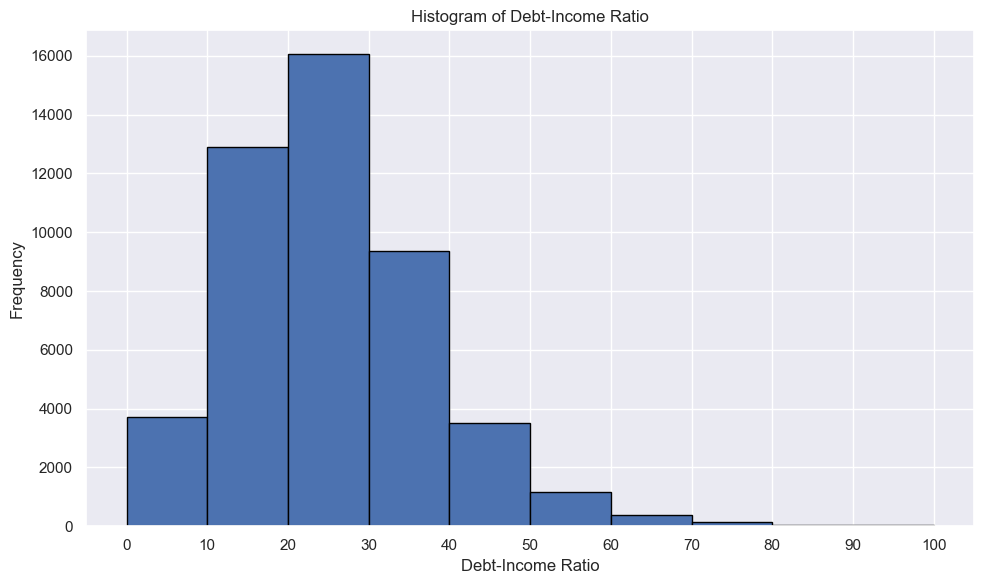

In [110]:
# Define the bins for aggregation.
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a histogram with aggregated bins.
plt.figure(figsize=(10, 6))
plt.hist(df_merged['DTI'], bins=bins, edgecolor='black')
plt.title('Histogram of Debt-Income Ratio')
plt.xlabel('Debt-Income Ratio')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.grid(True)
plt.tight_layout()

# Display the plot.
plt.show()

> According to:
- experian.com: Generally, to get a qualified mortgage, your DTI needs to be below 43%. In fact, the lower your DTI the better, and many lenders prefer ratios below 36%.
https://www.experian.com/blogs/ask-experian/how-to-calculate-your-debt-to-income-ratio/#s2
    
    
- chase.com: When your DTI falls between 35% and 50%, you'll usually be eligible for some approvals. Even so, your financing terms on lines of credit will be better if you hit the premium level of sub-35% debt-to-income.
https://www.chase.com/personal/credit-cards/education/basics/what-is-debt-to-income-ratio-and-why-it-is-important

---------------

---------

### Check for missing values

In [111]:
# Check for missing values in df_merged.
missing_values = df_merged.isnull().sum()

# View the result.
missing_values

uuid                                 0
date_created_x                       0
amount_requested                     0
duration_requested                   0
reason                               0
annual_salary                        0
dependant_number                     0
dependants_spend                     0
has_mortgage_x                       0
monthly_spending                     0
rent_mortgage_spend                  0
employment_status                    0
number_applications                  0
tax                                  0
net_salary                           0
monthly_earnings                     0
clusters                             0
disposable_income                    0
rejected                             0
interest_rate                        0
repayment                            0
income_after_repay                   0
date_created_y                   29769
new_to_credit_on_date_created    29769
salary_band_5000s                29769
salary_band_10000s       

> High number of missing values in several columns including o1,o2,o3, ccj_flag, missed_2+_payments _past_36m, credit_score_100s, salary_band_5000s and salary_band_10000s.

#### Salary

In [112]:
# Check the correlation of 'salary_band_5000s' with other columns in df_merged.
corr_salary_band_5000s = df_merged.corr()['salary_band_5000s'].sort_values(ascending=False, key=abs)

# View the result.
corr_salary_band_5000s.head()

salary_band_5000s     1.000000
salary_band_10000s    0.992407
annual_salary         0.975230
monthly_earnings      0.971646
net_salary            0.971646
Name: salary_band_5000s, dtype: float64

> There is a high corellation between salary_band_5000s values and salary_band_10000s (orgin: bureau dataset) and declared annual salary  and mothly_earnings derived from annual_salary (origin: applicant data).

In [113]:
# Fill missing values in 'salary_band_5000s' using 'salary_band_10000s'.
df_merged['salary_band_5000s'].fillna(df_merged['salary_band_10000s'], inplace=True)

# Fill any remaining missing values in 'salary_band_5000s' using 'annual_salary'.
df_merged['salary_band_5000s'].fillna(df_merged['annual_salary'], inplace=True)

# Fill missing values in 'salary_band_10000s' using 'salary_band_5000s'
df_merged['salary_band_10000s'].fillna(df_merged['salary_band_5000s'], inplace=True)

# Check for any remaining missing values in both columns.
missing_5000s = df_merged['salary_band_5000s'].isnull().sum()
missing_10000s = df_merged['salary_band_10000s'].isnull().sum()

# Print any missing values.
print(f"Missing values in 'salary_band_5000s': {missing_5000s}")
print(f"Missing values in 'salary_band_10000s': {missing_10000s}")

Missing values in 'salary_band_5000s': 0
Missing values in 'salary_band_10000s': 0


#### Self Employed Flag

In [114]:
# Fill missing values in 'self_employed_flag' with 1 where 'employment_status' is 'SELF_EMPLOYED'.
df_merged.loc[(df_merged['employment_status'] == 'SELF_EMPLOYED') & 
              (df_merged['self_employed_flag'].isnull()), 'self_employed_flag'] = 1

# Check for missing values.
df_merged['self_employed_flag'].isnull().sum()

24808

In [115]:
# Fill missing values in 'self_employed_flag' with 0 where 'employment_status' is any other status.
no_self_employed = (df_merged['self_employed_flag'].isnull()) & (df_merged['employment_status'] != 'SELF_EMPLOYED')

# Fill these rows with 0
df_merged.loc[no_self_employed, 'self_employed_flag'] = 0

# Recheck for missing values.
df_merged['self_employed_flag'].isnull().sum()

0

In [116]:
# View shape of dataframe.
df_merged.shape

(47377, 37)

In [117]:
# View info.
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47377 entries, 0 to 47376
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   uuid                           47377 non-null  object        
 1   date_created_x                 47377 non-null  datetime64[ns]
 2   amount_requested               47377 non-null  int64         
 3   duration_requested             47377 non-null  int64         
 4   reason                         47377 non-null  object        
 5   annual_salary                  47377 non-null  int64         
 6   dependant_number               47377 non-null  int64         
 7   dependants_spend               47377 non-null  float64       
 8   has_mortgage_x                 47377 non-null  object        
 9   monthly_spending               47377 non-null  int64         
 10  rent_mortgage_spend            47377 non-null  float64       
 11  employment_stat

## Drop missing values
>  The applicant's dataset has 29769 rows more than the bureau dataset. We filled identified missing values, in a df_merged dataframe, for salary bands and self employed flag following the process as above but data related to eg. missed_payments did not overlap between datasets. Replacing missing values with mean or 0 did not appear suitable at this stage of analysis, as we wanted to obtain correct results of the models, thus we decided to drop the rows with remaining missing values.

In [118]:
# Drop missing values.
df_model = df_merged.dropna()

# View the result.
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17608 entries, 1 to 47376
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   uuid                           17608 non-null  object        
 1   date_created_x                 17608 non-null  datetime64[ns]
 2   amount_requested               17608 non-null  int64         
 3   duration_requested             17608 non-null  int64         
 4   reason                         17608 non-null  object        
 5   annual_salary                  17608 non-null  int64         
 6   dependant_number               17608 non-null  int64         
 7   dependants_spend               17608 non-null  float64       
 8   has_mortgage_x                 17608 non-null  object        
 9   monthly_spending               17608 non-null  int64         
 10  rent_mortgage_spend            17608 non-null  float64       
 11  employment_stat

--------------

-----------

## Export the CSV file that can be used for models.

In [119]:
# Export the CSV file 
df_model.to_csv('df_model.csv', index=False)

- Please move to next Jupiter notebook called:
    2.Team8_LSE_EP_Assignment3_Models (Default, Affordability Risk & Flag) 